In [2]:
df = pd.read_excel('distribution.xlsx')

In [3]:
import xlrd
import hangul_font
import matplotlib.pyplot as plt
%matplotlib inline

Hangul font is set!


In [4]:
df = pd.read_excel('distribution.xlsx',
                   sheet_name = '종합테이블(TB_DD_STR_PURCH_CLS)',
                   header = 0,
                   dtype = {'OPER_DT': str,
                            'PVN':str,
                            'BOR':str,
                            'ADMD':str,
                            'AMT_IND':float,
                            'LCLS_10_P':float,
                            'LCLS_20_P':float,
                            'LCLS_30_P':float,
                            'LCLS_40_P':float,
                            'LCLS_50_P':float,
                            'LCLS_60_P':float,
                            'LCLS_70_P':float,
                            'LCLS_80_P':float},
                   na_values='NaN',
                   nrows=14461)

In [5]:
df.tail(2)

,OPER_DT,PVN,BOR,ADMD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
14458,20200531,서울특별시,중구,황학동,1.134190,0.264708,0.257387,0.367001,0.029140,0.070770,0.00106,0.003646,0.006287
14459,20200531,서울특별시,중구,회현동,0.773963,0.316750,0.160035,0.410281,0.031188,0.071026,0.00000,0.009057,0.001663


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14460 entries, 0 to 14459
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OPER_DT    14460 non-null  object 
 1   PVN        14460 non-null  object 
 2   BOR        14460 non-null  object 
 3   ADMD       14460 non-null  object 
 4   AMT_IND    14460 non-null  float64
 5   LCLS_10_P  14460 non-null  float64
 6   LCLS_20_P  14460 non-null  float64
 7   LCLS_30_P  14460 non-null  float64
 8   LCLS_40_P  14460 non-null  float64
 9   LCLS_50_P  14460 non-null  float64
 10  LCLS_60_P  14460 non-null  float64
 11  LCLS_70_P  14460 non-null  float64
 12  LCLS_80_P  14460 non-null  float64
dtypes: float64(9), object(4)
memory usage: 1.4+ MB


In [7]:
# 매출 기준일과 기준동은 2019.04.11, 서울 중구 신당5동임
df.loc[(df['OPER_DT'] == '20190411') & (df['ADMD'] == '신당5동')]

,OPER_DT,PVN,BOR,ADMD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
4190,20190411,서울특별시,중구,신당5동,1.0,0.277475,0.257129,0.341531,0.051694,0.052843,0.0054,0.002258,0.01167


#### 1. 년도별로 먼저 나눠주기 

In [8]:
df_19 = df[0:7200]
df_20 = df[7200:]

#### 2. 구별로 나눠주기

In [9]:
df_19_seo_j = df_19[(df_19["PVN"] == '서울특별시') & (df_19["BOR"] == '중구')]
df_19_seo_n = df_19[(df_19["PVN"] == '서울특별시') & (df_19["BOR"] == '노원구')]
df_19_dae_j = df_19[(df_19["PVN"] == '대구광역시') & (df_19["BOR"] == '중구')]
df_19_dae_s = df_19[(df_19["PVN"] == '대구광역시') & (df_19["BOR"] == '수성구')]

In [10]:
df_20_seo_j = df_20[(df_20["PVN"] == '서울특별시') & (df_20["BOR"] == '중구')]
df_20_seo_n = df_20[(df_20["PVN"] == '서울특별시') & (df_20["BOR"] == '노원구')]
df_20_dae_j = df_20[(df_20["PVN"] == '대구광역시') & (df_20["BOR"] == '중구')]
df_20_dae_s = df_20[(df_20["PVN"] == '대구광역시') & (df_20["BOR"] == '수성구')]

#### 3. 동도 소속 행정구역끼리 묶어주기

In [11]:
aggregation_functions = {'AMT_IND': 'sum'}
df_19_seo_j_sum_amt = df_19_seo_j.groupby(df_19_seo_j['OPER_DT'], as_index=False).aggregate(aggregation_functions)
df_19_seo_n_sum_amt = df_19_seo_n.groupby(df_19_seo_n['OPER_DT'], as_index=False).aggregate(aggregation_functions)
df_19_dae_j_sum_amt = df_19_dae_j.groupby(df_19_dae_j['OPER_DT'], as_index=False).aggregate(aggregation_functions)
df_19_dae_s_sum_amt = df_19_dae_s.groupby(df_19_dae_s['OPER_DT'], as_index=False).aggregate(aggregation_functions)

In [12]:
- 2019/2020년 지역별 월별 업종별 매출비교 -> y축 기준을 한개로 고정해서 지역을 같이 두고 비교

SyntaxError: invalid syntax (<ipython-input-12-54c5aa5c27b0>, line 1)

In [13]:
aggregation_functions = {'AMT_IND': 'sum'}
df_20_seo_j_sum_amt = df_20_seo_j.groupby(df_20_seo_j['OPER_DT'], as_index=False).aggregate(aggregation_functions)
df_20_seo_n_sum_amt = df_20_seo_n.groupby(df_20_seo_n['OPER_DT'], as_index=False).aggregate(aggregation_functions)
df_20_dae_j_sum_amt = df_20_dae_j.groupby(df_20_dae_j['OPER_DT'], as_index=False).aggregate(aggregation_functions)
df_20_dae_s_sum_amt = df_20_dae_s.groupby(df_20_dae_s['OPER_DT'], as_index=False).aggregate(aggregation_functions)

In [14]:
df_20_seo_j_sum_amt, df_19_seo_j_sum_amt

(      OPER_DT    AMT_IND
 0    20200201  18.941511
 1    20200202  17.216085
 2    20200203  20.944280
 3    20200204  21.041575
 4    20200205  20.518967
 ..        ...        ...
 116  20200527  17.740383
 117  20200528  18.271545
 118  20200529  18.849903
 119  20200530  16.495260
 120  20200531  14.413182
 
 [121 rows x 2 columns],
       OPER_DT    AMT_IND
 0    20190201  18.918036
 1    20190202  15.882379
 2    20190203  15.455309
 3    20190204  13.989231
 4    20190205  15.850089
 ..        ...        ...
 115  20190527  21.016365
 116  20190528  22.227387
 117  20190529  22.526331
 118  20190530  22.560594
 119  20190531  22.867152
 
 [120 rows x 2 columns])

In [15]:
# 2020년 2월은 2019년 2월보다 하루 더 길다(29일까지 있다)
df_20_seo_j_sum_amt.loc[(df_20_seo_j_sum_amt['OPER_DT'] == '20200229')]
df_20_dae_j_sum_amt.iloc[28]

OPER_DT    20200229
AMT_IND     4.67759
Name: 28, dtype: object

In [16]:
df_20_seo_j_sum_amt2 = df_20_seo_j_sum_amt.drop(28)
df_20_seo_n_sum_amt2 = df_20_seo_n_sum_amt.drop(28)
df_20_dae_j_sum_amt2 = df_20_dae_j_sum_amt.drop(28)
df_20_dae_s_sum_amt2 = df_20_dae_s_sum_amt.drop(28)

### 2. 구별 동기간 매출 지수 비교

- x (시간 190201 ~ 190531 & 200201 ~ 200531) = OPER_DT
    - !대조를 위해서 20200229는 뺴줬다
- y (매출지수) = AMT_IND
- 년도: 2019 (df_19), 2020 (df_20):
    - 서울:
        - 중구, 노원구
        - seo_j, seo_n
    - 대구:
        - 중구, 수성구
        - dae_j, dae_s 

In [17]:
x_std = df_19_dae_s_sum_amt.OPER_DT.apply(lambda x : x[4:8])
x_std

0      0201
1      0202
2      0203
3      0204
4      0205
       ... 
115    0527
116    0528
117    0529
118    0530
119    0531
Name: OPER_DT, Length: 120, dtype: object

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

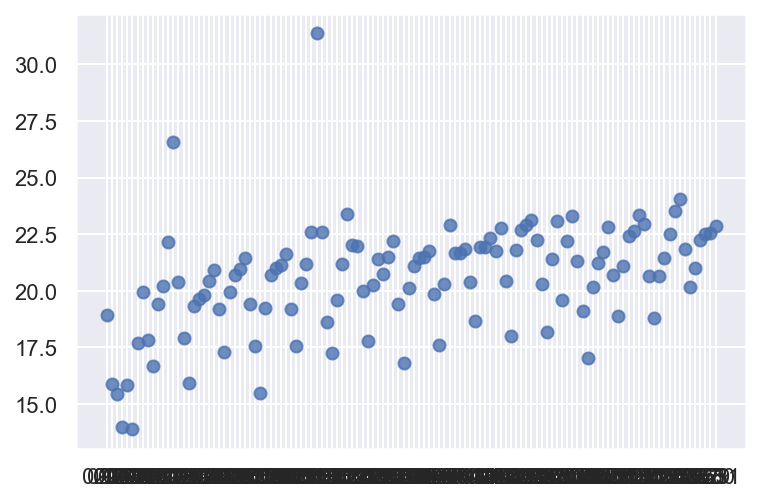

In [18]:
import seaborn as sns
# Your DataFrame here 

sns.regplot(x=x_std,y=df_19_seo_j_sum_amt.AMT_IND,fit_reg=True)

In [21]:
df_19_seo_j_sum_amt.AMT_IND

0      18.918036
1      15.882379
2      15.455309
3      13.989231
4      15.850089
         ...    
115    21.016365
116    22.227387
117    22.526331
118    22.560594
119    22.867152
Name: AMT_IND, Length: 120, dtype: float64

In [22]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
x_std.ast

0      0201
1      0202
2      0203
3      0204
4      0205
       ... 
115    0527
116    0528
117    0529
118    0530
119    0531
Name: OPER_DT, Length: 120, dtype: object

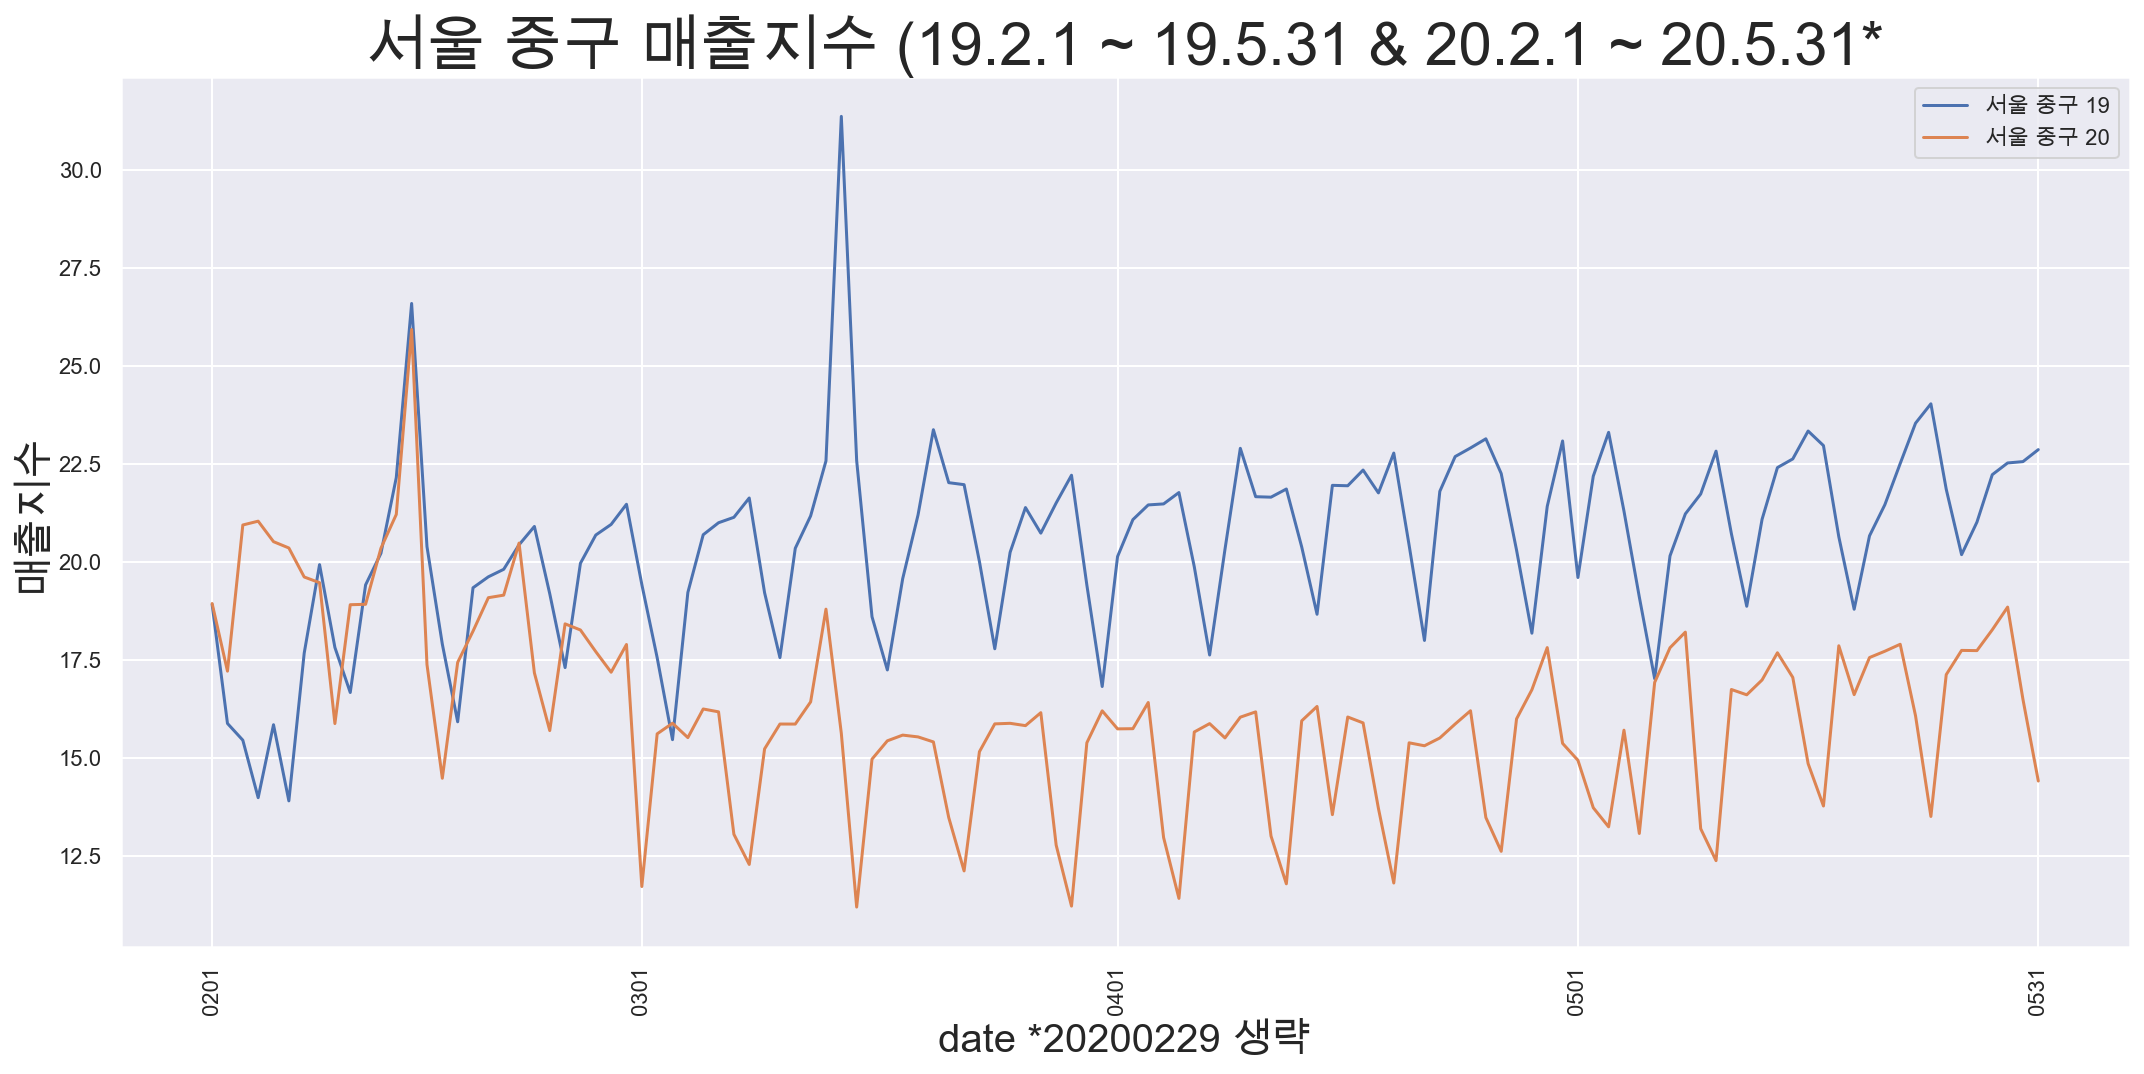

In [20]:
x_std
y1 = df_19_seo_j_sum_amt.AMT_IND
y2 = df_20_seo_j_sum_amt2.AMT_IND

# sns.regplot(x=x_std,y=y1,fit_reg=True)
plt.figure(figsize=(18,8))
plt.plot(x_std, y1, label='서울 중구 19')
plt.plot(x_std, y2, label='서울 중구 20')
plt.grid(b=True)
plt.legend()
plt.xlabel('date *20200229 생략', fontsize=20)
plt.ylabel('매출지수', fontsize=20)
plt.xticks([0, 28, 59, 89, 119], rotation=90)
plt.minorticks_on()
plt.title('서울 중구 매출지수 (19.2.1 ~ 19.5.31 & 20.2.1 ~ 20.5.31*', fontsize=30)
plt.show()


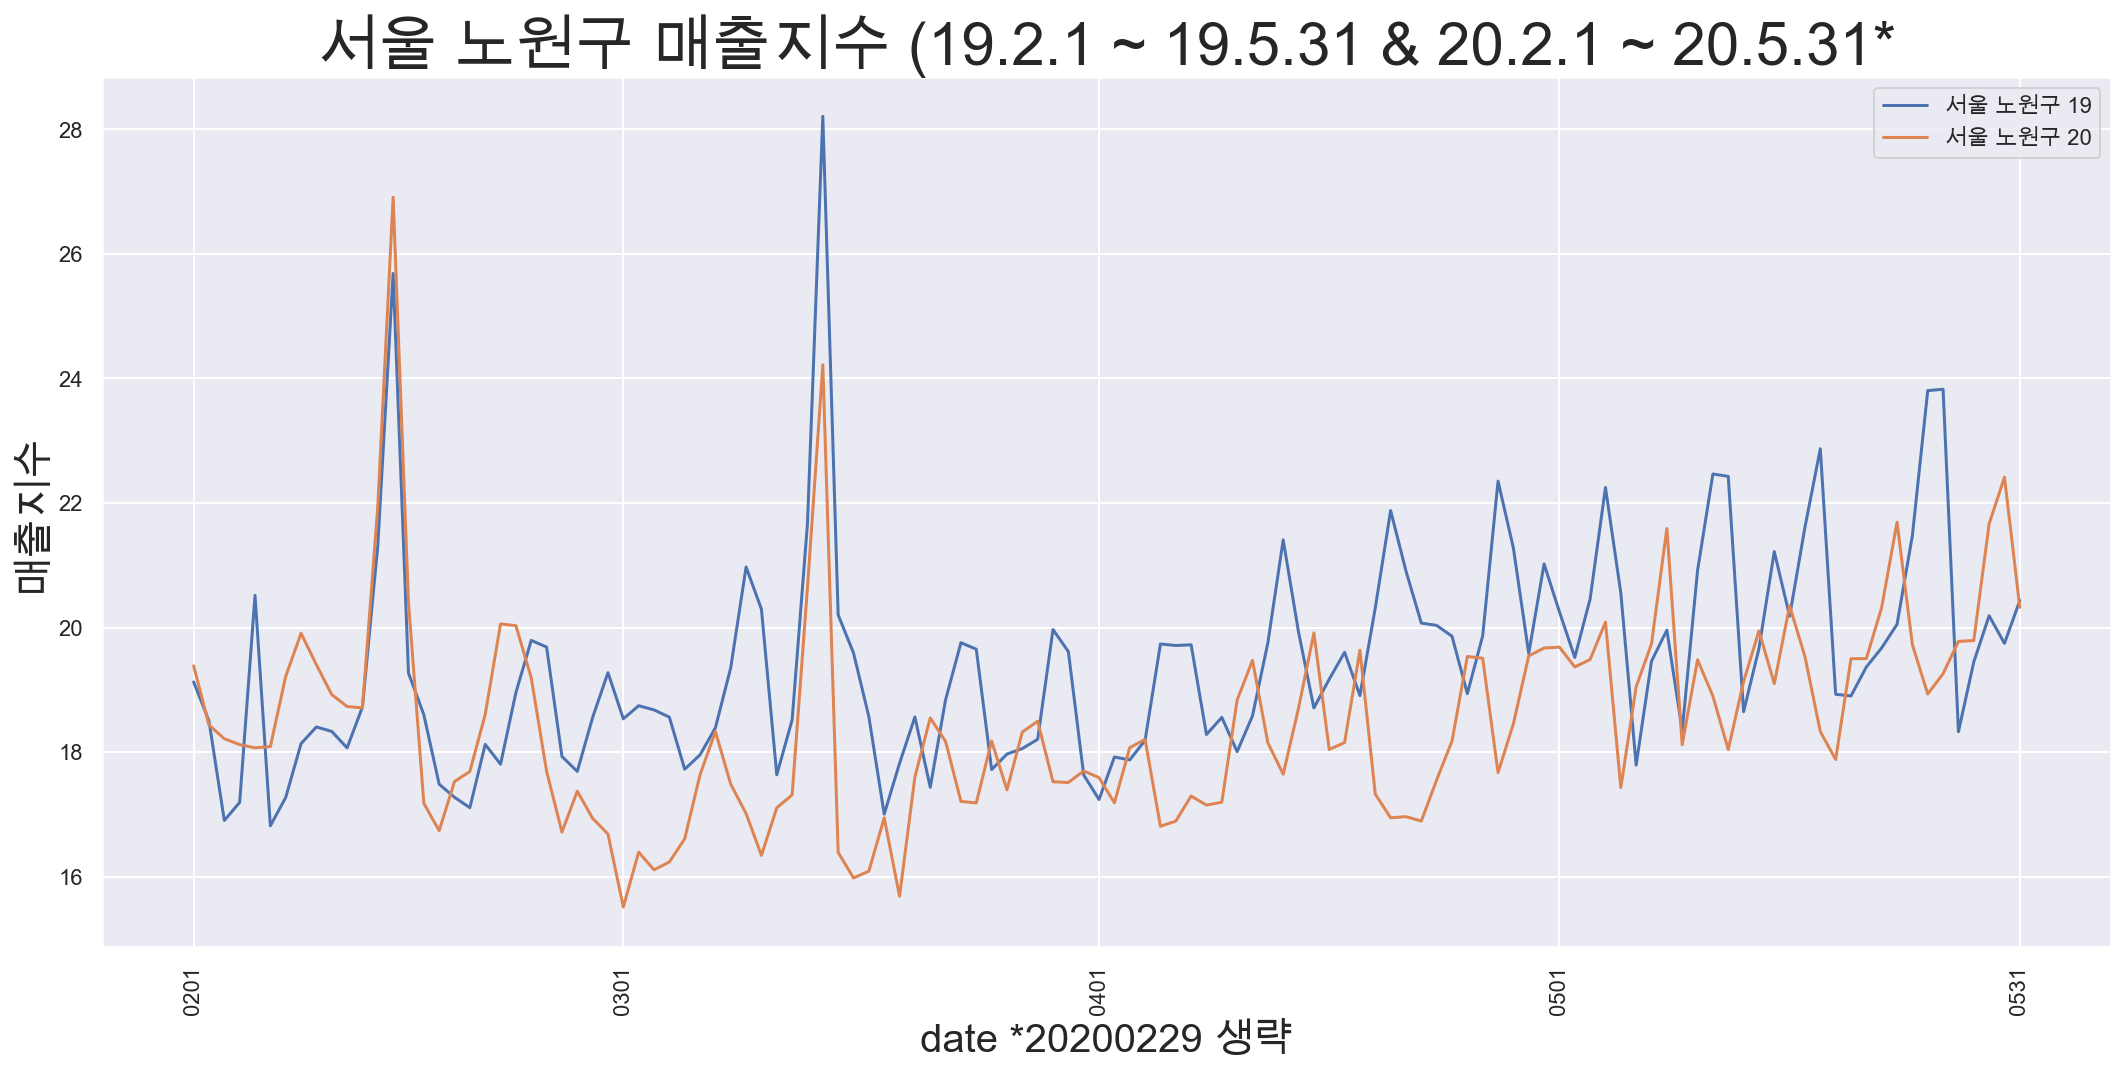

In [31]:
x_std
y1 = df_19_seo_n_sum_amt.AMT_IND
y2 = df_20_seo_n_sum_amt2.AMT_IND


plt.figure(figsize=(18,8))
plt.plot(x_std, y1, label='서울 노원구 19')
plt.plot(x_std, y2, label='서울 노원구 20')
plt.grid(b=True)
plt.legend()
plt.xlabel('date *20200229 생략', fontsize=20)
plt.ylabel('매출지수', fontsize=20)
plt.xticks([0, 28, 59, 89, 119], rotation=90)
plt.minorticks_on()
plt.title('서울 노원구 매출지수 (19.2.1 ~ 19.5.31 & 20.2.1 ~ 20.5.31*', fontsize=30)
plt.show()

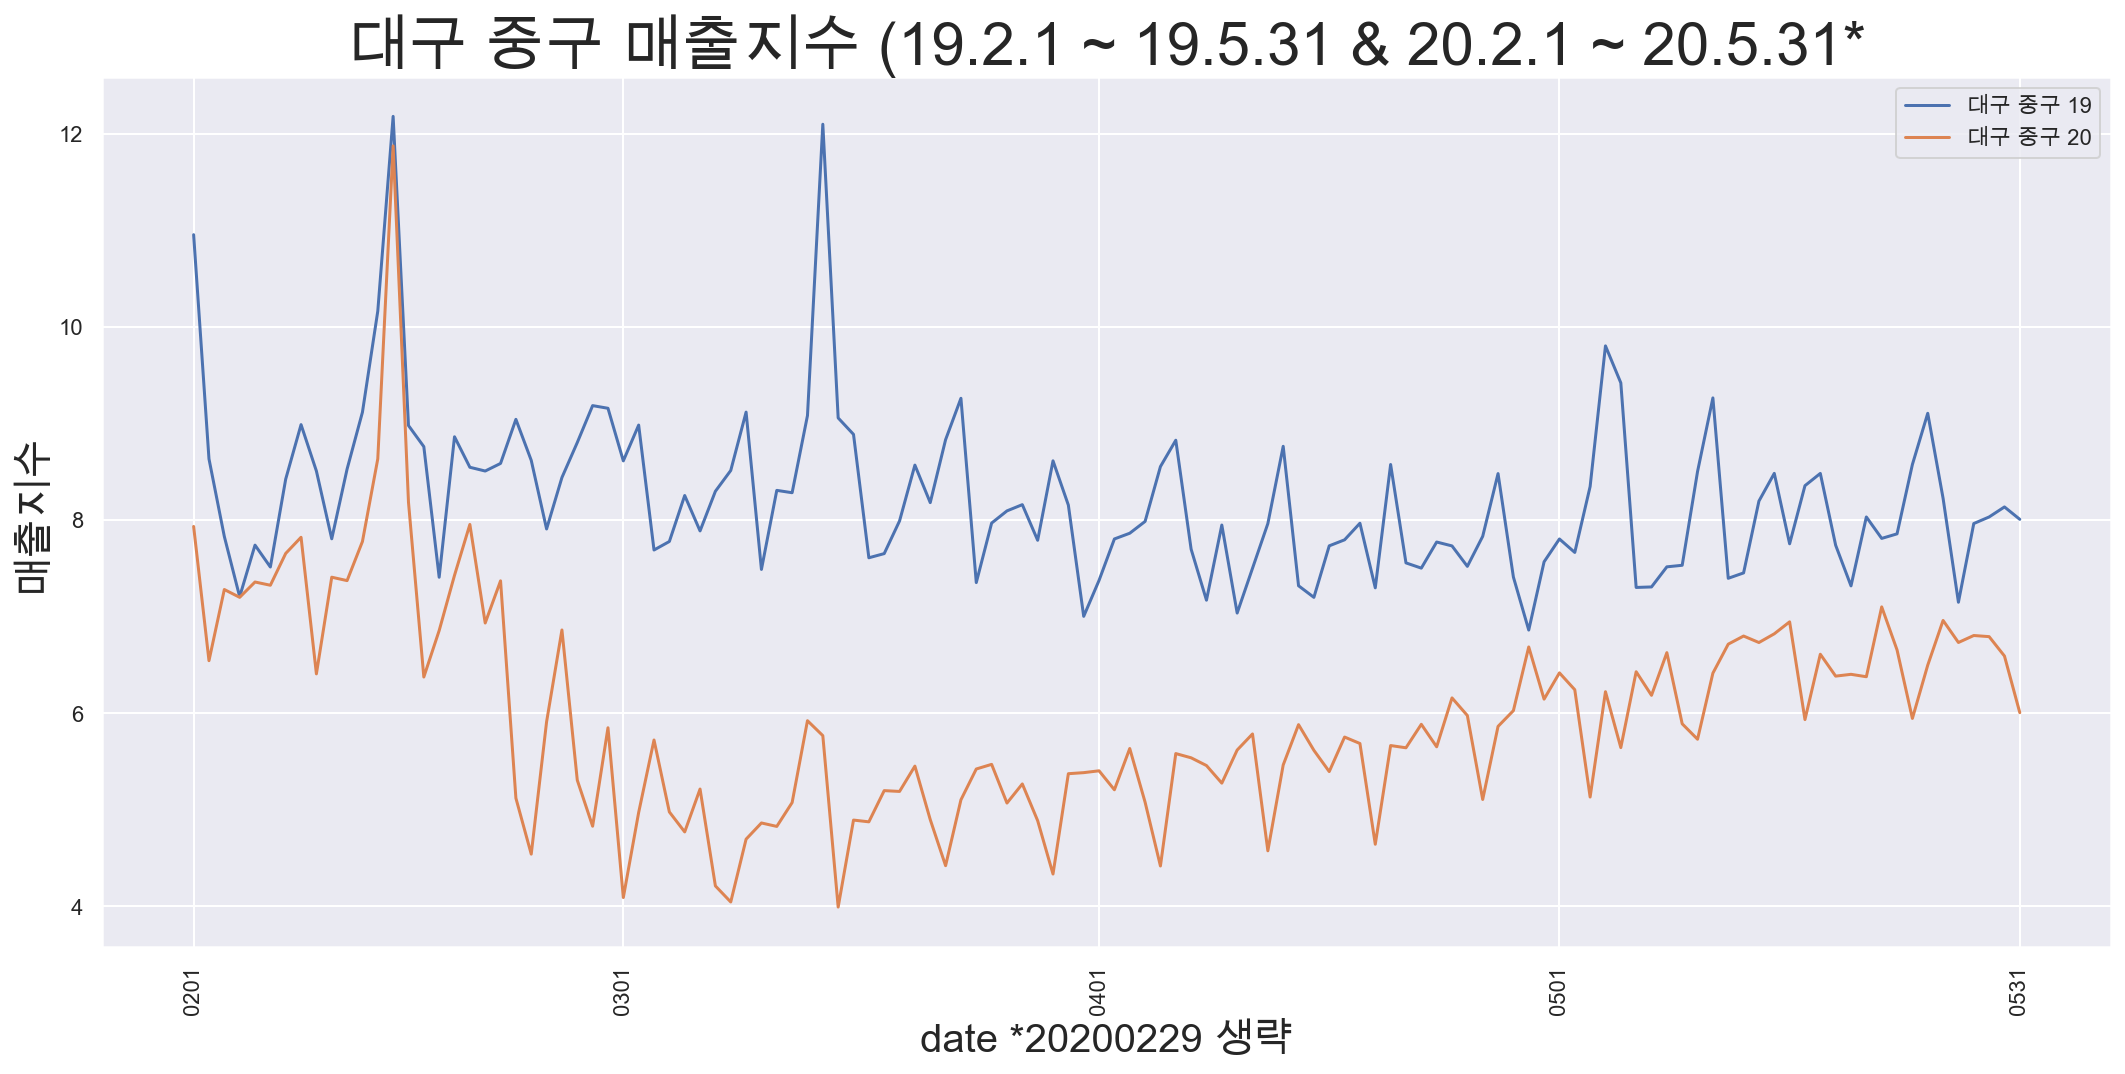

In [17]:
x_std
y1 = df_19_dae_j_sum_amt.AMT_IND
y2 = df_20_dae_j_sum_amt2.AMT_IND


plt.figure(figsize=(18,8))
plt.plot(x_std, y1, label='대구 중구 19')
plt.plot(x_std, y2, label='대구 중구 20')
plt.grid(b=True)
plt.legend()
plt.xlabel('date *20200229 생략', fontsize=20)
plt.ylabel('매출지수', fontsize=20)
plt.xticks([0, 28, 59, 89, 119], rotation=90)
plt.minorticks_on()
plt.title('대구 중구 매출지수 (19.2.1 ~ 19.5.31 & 20.2.1 ~ 20.5.31*', fontsize=30)
plt.show()

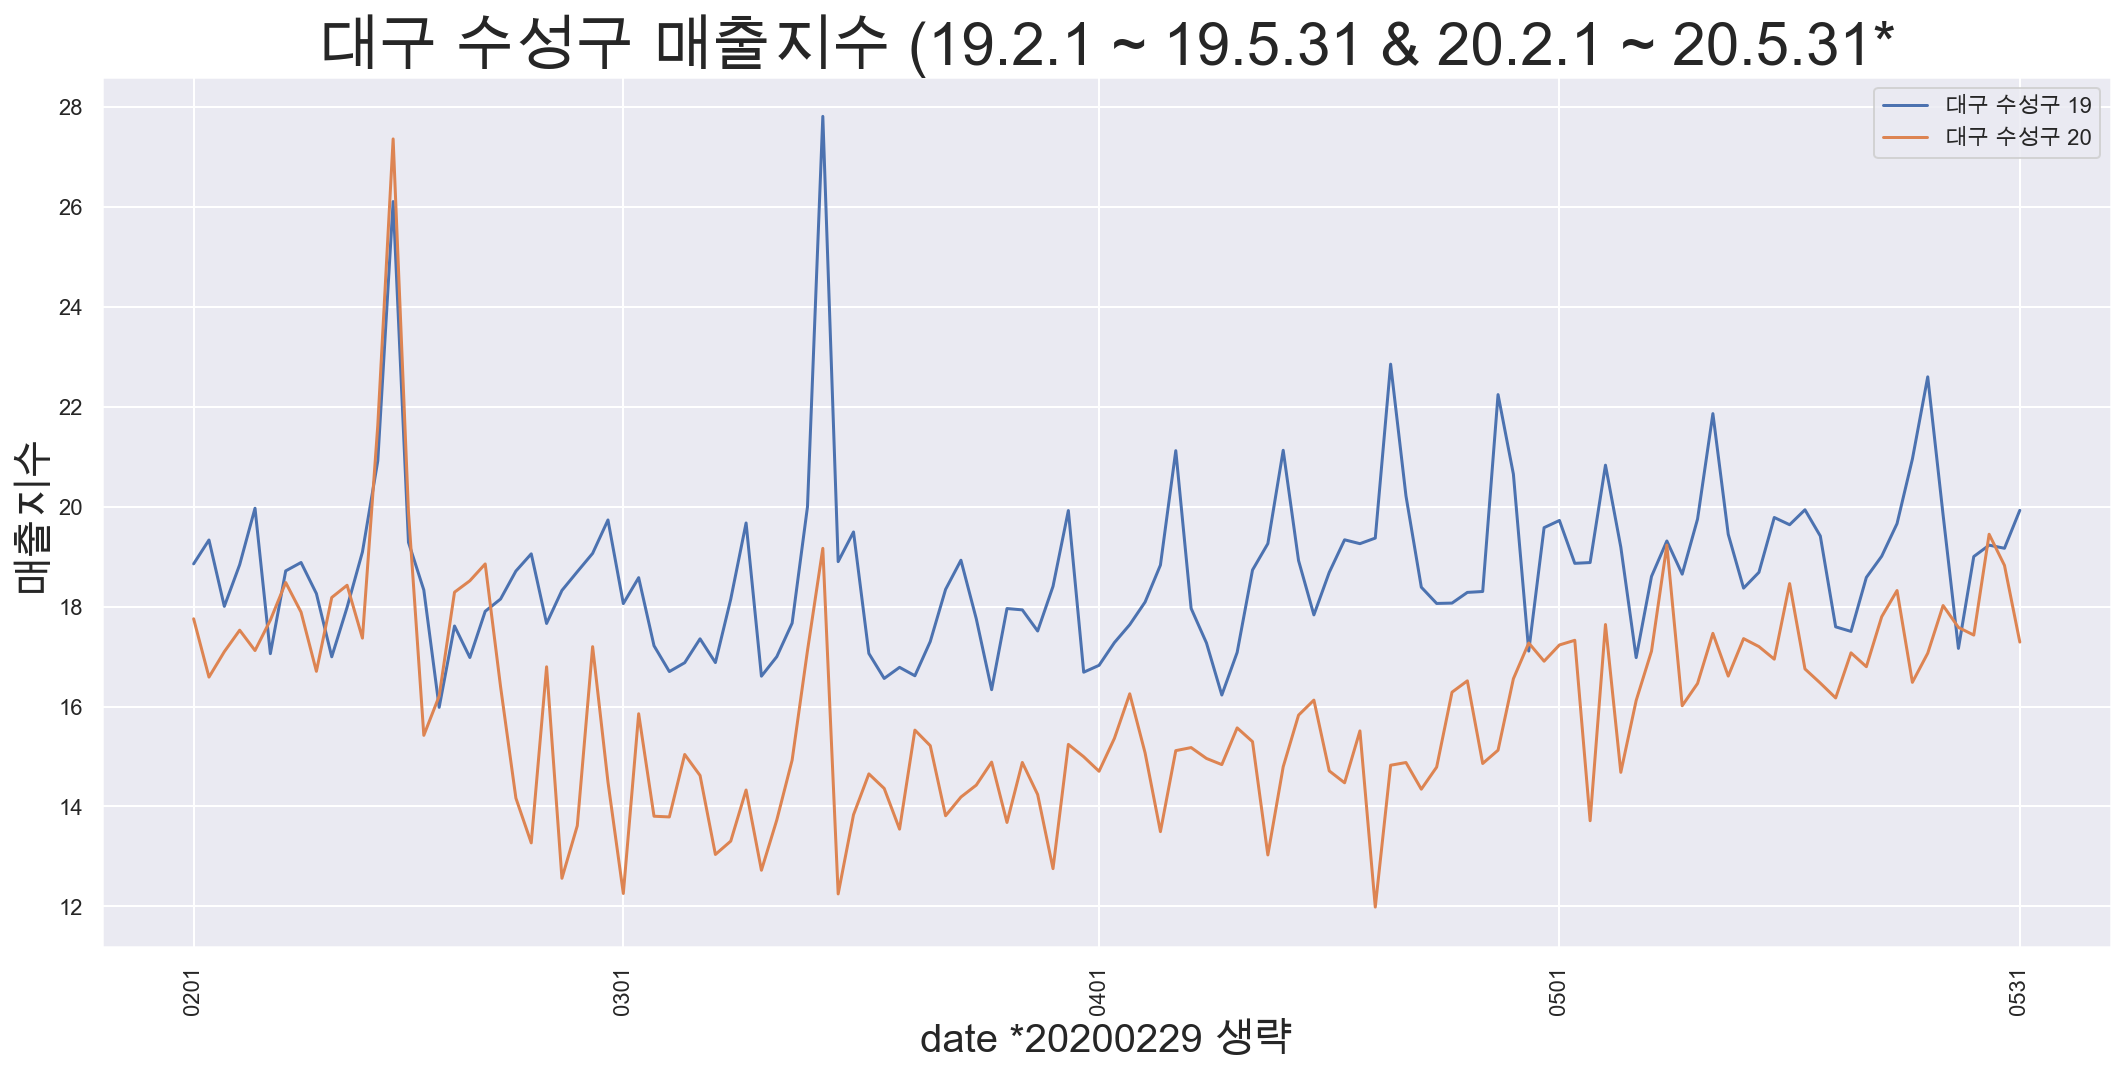

In [18]:
x_std
y1 = df_19_dae_s_sum_amt.AMT_IND
y2 = df_20_dae_s_sum_amt2.AMT_IND


plt.figure(figsize=(18,8))
plt.plot(x_std, y1, label='대구 수성구 19')
plt.plot(x_std, y2, label='대구 수성구 20')
plt.grid(b=True)
plt.legend()
plt.xlabel('date *20200229 생략', fontsize=20)
plt.ylabel('매출지수', fontsize=20)
plt.xticks([0, 28, 59, 89, 119], rotation=90)
plt.minorticks_on()
plt.title('대구 수성구 매출지수 (19.2.1 ~ 19.5.31 & 20.2.1 ~ 20.5.31*', fontsize=30)
plt.show()

### 3. 월별 카테고리 유통 비율 
- 카테고리 매출비중은 전체 매출 내 각 카테고리별 매출 비중
- 비중 전체 합이 100%로 집계

- LCLS_XX_P:
    - XX:
        - 10 : 식사
        - 20 : 간식
        - 30 : 마실거리
        - 40 : 홈 & 리빙
        - 50 : 헬스 & 뷰티
        - 60 : 취미 & 여가활동 
        - 70 : 사회활동
        - 80 : 임신/육아
        - 90 : 기호품

- x (카테고리별 비중 * 당일 매출지수
- y (지역(구)) = AMT_IND
     
- 년도: 2019 (df_19), 2020 (df_20):
    - 서울:
        - 중구, 노원구
        - seo_j, seo_n
    - 대구:
        - 중구, 수성구
        - dae_j, dae_s 

In [124]:
df_19_ = pd.DataFrame()
df_19_[["OPER_DT", 'PVN', "BOR"]] = df_19[["OPER_DT", "PVN", "BOR"]]

In [250]:
df_19

,OPER_DT,PVN,BOR,ADMD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
0,20190201,대구광역시,수성구,고산1동,1.064336,0.450848,0.172221,0.295458,0.023263,0.044679,0.005075,0.004820,0.003637
1,20190201,대구광역시,수성구,고산2동,1.076418,0.457937,0.196274,0.295564,0.005521,0.034056,0.000844,0.008893,0.000913
2,20190201,대구광역시,수성구,고산3동,0.856071,0.359978,0.196602,0.376762,0.013408,0.029606,0.009117,0.008831,0.005697
3,20190201,대구광역시,수성구,두산동,0.724868,0.281969,0.175207,0.363202,0.024235,0.134191,0.000000,0.021196,0.000000
4,20190201,대구광역시,수성구,만촌1동,1.155728,0.400983,0.200454,0.310531,0.038868,0.035427,0.005284,0.005734,0.002719
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,20190531,서울특별시,중구,중림동,1.104929,0.303983,0.221554,0.400640,0.023648,0.041415,0.000000,0.007839,0.000920
7196,20190531,서울특별시,중구,청구동,1.464850,0.300005,0.214617,0.391840,0.041375,0.031329,0.012856,0.003418,0.004559
7197,20190531,서울특별시,중구,필동,1.734506,0.306059,0.199257,0.384865,0.033652,0.057027,0.005471,0.008752,0.004917
7198,20190531,서울특별시,중구,황학동,1.163772,0.284708,0.212218,0.390125,0.032516,0.052842,0.010703,0.007287,0.009601


In [125]:
# 카테고리별 비율에 당일 매출지수 가중치를 곱해준다
# 
categories_kor = ["식사", '간식', '마실거리', '홈/리빙', '헬스/뷰티', '취미/여가활동', '사회활동', '임신/육아']
categories = ['LCLS_10_P','LCLS_20_P','LCLS_30_P','LCLS_40_P','LCLS_50_P','LCLS_60_P', 'LCLS_70_P','LCLS_80_P']
for category1, category in zip(categories_kor, categories):
    df_19_[category1] = df_19[category]*df['AMT_IND']
    df_19_[category1] = df_19_[category1].round(2)

In [126]:
# 일별을 월별로 비교하기 위해 묶어서 새로운 칼럼을 만들어 준다
df_19_["month"] = df_19_.OPER_DT.apply(lambda x : x[4:6])

In [128]:
df_19_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OPER_DT  7200 non-null   object 
 1   PVN      7200 non-null   object 
 2   BOR      7200 non-null   object 
 3   식사       7200 non-null   float64
 4   간식       7200 non-null   float64
 5   마실거리     7200 non-null   float64
 6   홈/리빙     7200 non-null   float64
 7   헬스/뷰티    7200 non-null   float64
 8   취미/여가활동  7200 non-null   float64
 9   사회활동     7200 non-null   float64
 10  임신/육아    7200 non-null   float64
 11  month    7200 non-null   object 
dtypes: float64(8), object(4)
memory usage: 675.1+ KB


In [254]:
df_19_

,OPER_DT,PVN,BOR,식사,간식,마실거리,홈/리빙,헬스/뷰티,취미/여가활동,사회활동,임신/육아,month
0,20190201,대구광역시,수성구,0.48,0.18,0.31,0.02,0.05,0.01,0.01,0.00,02
1,20190201,대구광역시,수성구,0.49,0.21,0.32,0.01,0.04,0.00,0.01,0.00,02
2,20190201,대구광역시,수성구,0.31,0.17,0.32,0.01,0.03,0.01,0.01,0.00,02
3,20190201,대구광역시,수성구,0.20,0.13,0.26,0.02,0.10,0.00,0.02,0.00,02
4,20190201,대구광역시,수성구,0.46,0.23,0.36,0.04,0.04,0.01,0.01,0.00,02
...,...,...,...,...,...,...,...,...,...,...,...,...
7195,20190531,서울특별시,중구,0.34,0.24,0.44,0.03,0.05,0.00,0.01,0.00,05
7196,20190531,서울특별시,중구,0.44,0.31,0.57,0.06,0.05,0.02,0.01,0.01,05
7197,20190531,서울특별시,중구,0.53,0.35,0.67,0.06,0.10,0.01,0.02,0.01,05
7198,20190531,서울특별시,중구,0.33,0.25,0.45,0.04,0.06,0.01,0.01,0.01,05


In [129]:
# 19년 월별 데이터프레임 생성
df_19_02 = df_19_[df_19_["month"] == '02']
df_19_03 = df_19_[df_19_["month"] == '03']
df_19_04 = df_19_[df_19_["month"] == '04']
df_19_05 = df_19_[df_19_["month"] == '05']

In [131]:
# 2019년 2월부터 5월까지 구역별로 묶어서 데이터프레임을 세분화했다
# 구역 그리고 월별로 groupby해주면서 매출지수를 곱해준 카테고리마다의 비중을 평균값으로 다시 한번 바꿔줬다
df_19_02_ = df_19_02[df_19_02['PVN'] == '서울특별시'].groupby(df_19_02['BOR'] == '중구', as_index=False).agg('mean')[categories_kor]
df_19_02_ = df_19_02_.append(df_19_02[df_19_02['PVN'] == '대구광역시'].groupby(df_19_02['BOR'] == '중구', as_index=False).agg('mean')[categories_kor], ignore_index=True)
df_19_02_["지역"] = ['seo_n', 'seo_j', 'dae_s', 'dae_j']

In [132]:
df_19_03_ = df_19_03[df_19_03['PVN'] == '서울특별시'].groupby(df_19_03['BOR'] == '중구', as_index=False).agg('mean')[categories_kor]
df_19_03_ = df_19_03_.append(df_19_03[df_19_03['PVN'] == '대구광역시'].groupby(df_19_03['BOR'] == '중구', as_index=False).agg('mean')[categories_kor], ignore_index=True)
df_19_03_["지역"] = ['seo_n', 'seo_j', 'dae_s', 'dae_j']

In [133]:
df_19_04_ = df_19_04[df_19_04['PVN'] == '서울특별시'].groupby(df_19_04['BOR'] == '중구', as_index=False).agg('mean')[categories_kor]
df_19_04_ = df_19_04_.append(df_19_04[df_19_04['PVN'] == '대구광역시'].groupby(df_19_04['BOR'] == '중구', as_index=False).agg('mean')[categories_kor], ignore_index=True)
df_19_04_["지역"] = ['seo_n', 'seo_j', 'dae_s', 'dae_j']

In [134]:
df_19_05_ = df_19_05[df_19_05['PVN'] == '서울특별시'].groupby(df_19_05['BOR'] == '중구', as_index=False).agg('mean')[categories_kor]
df_19_05_ = df_19_05_.append(df_19_05[df_19_05['PVN'] == '대구광역시'].groupby(df_19_05['BOR'] == '중구', as_index=False).agg('mean')[categories_kor], ignore_index=True)
df_19_05_["지역"] = ['seo_n', 'seo_j', 'dae_s', 'dae_j']

In [143]:
scaler = []
for x in range (0,4):
    y= sum(list(df_19_02_.iloc[x,:8]))
    scaler.append(y)
df_19_02_['scaler'] = scaler

scaler = []
for x in range (0,4):
    y= sum(list(df_19_03_.iloc[x,:8]))
    scaler.append(y)
df_19_03_['scaler'] = scaler

scaler = []
for x in range (0,4):
    y= sum(list(df_19_04_.iloc[x,:8]))
    scaler.append(y)
df_19_04_['scaler'] = scaler

scaler = []
for x in range (0,4):
    y= sum(list(df_19_05_.iloc[x,:8]))
    scaler.append(y)
df_19_05_['scaler'] = scaler

In [151]:
# 그래프로 상대적 비율을 볼 수 있게 스케일링 해줬다
for x in range(0,4):
    for category in categories_kor:
        new = df_19_02_[category][x]/df_19_02_['scaler'][x]
        df_19_02_[category][x] = new
for x in range(0,4):
    for category in categories_kor:
        new = df_19_03_[category][x]/df_19_03_['scaler'][x]
        df_19_03_[category][x] = new
for x in range(0,4):
    for category in categories_kor:
        new = df_19_04_[category][x]/df_19_04_['scaler'][x]
        df_19_04_[category][x] = new
for x in range(0,4):
    for category in categories_kor:
        new = df_19_05_[category][x]/df_19_05_['scaler'][x]
        df_19_05_[category][x] = new

/Users/dy/opt/anaconda3/envs/fc14/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/dy/opt/anaconda3/envs/fc14/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/dy/opt/anaconda3/envs/fc14/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/dy/opt/anaconda3/envs/fc14/lib/p

In [206]:
for x in range(0,4):
    df_19_02_['지역'][x] = df_19_02_['지역'][x]+'19'
for x in range(0,4):
    df_19_03_['지역'][x] = df_19_03_['지역'][x]+'19'
for x in range(0,4):
    df_19_04_['지역'][x] = df_19_04_['지역'][x]+'19'
for x in range(0,4):
    df_19_05_['지역'][x] = df_19_05_['지역'][x]+'19'

/Users/dy/opt/anaconda3/envs/fc14/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/dy/opt/anaconda3/envs/fc14/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/dy/opt/anaconda3/envs/fc14/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [135]:
# 2020년도 동일하게 전처리해줬다
df_20_ = pd.DataFrame()
df_20_[["OPER_DT", 'PVN', "BOR"]] = df_20[["OPER_DT", "PVN", "BOR"]]

categories_kor = ["식사", '간식', '마실거리', '홈/리빙', '헬스/뷰티', '취미/여가활동', '사회활동', '임신/육아']
categories = ['LCLS_10_P','LCLS_20_P','LCLS_30_P','LCLS_40_P','LCLS_50_P','LCLS_60_P', 'LCLS_70_P','LCLS_80_P']
for category1, category in zip(categories_kor, categories):
    df_20_[category1] = df_20[category]*df['AMT_IND']
    df_20_[category1] = df_20_[category1].round(2)
    
# 일별을 월별로 비교하기 위해 묶어서 새로운 칼럼을 만들어 준다
df_20_["month"] = df_20_.OPER_DT.apply(lambda x : x[4:6])

# 20년 월별 데이터프레임 생성
df_20_02 = df_20_[df_20_["month"] == '02']
df_20_03 = df_20_[df_20_["month"] == '03']
df_20_04 = df_20_[df_20_["month"] == '04']
df_20_05 = df_20_[df_20_["month"] == '05']

In [139]:
# 2020년 2월부터 5월까지 구역별로 묶어서 데이터프레임을 세분화했다
# 구역 그리고 월별로 groupby해주면서 매출지수를 곱해준 카테고리마다의 비중을 평균값으로 다시 한번 바꿔줬다

#2월
df_20_02_ = df_20_02[df_20_02['PVN'] == '서울특별시'].groupby(df_20_02['BOR'] == '중구', as_index=False).agg('mean')[categories_kor]
df_20_02_ = df_20_02_.append(df_20_02[df_20_02['PVN'] == '대구광역시'].groupby(df_20_02['BOR'] == '중구', as_index=False).agg('mean')[categories_kor], ignore_index=True)
df_20_02_["지역"] = ['seo_n', 'seo_j', 'dae_s', 'dae_j']

#3월
df_20_03_ = df_20_03[df_20_03['PVN'] == '서울특별시'].groupby(df_20_03['BOR'] == '중구', as_index=False).agg('mean')[categories_kor]
df_20_03_ = df_20_03_.append(df_20_03[df_20_03['PVN'] == '대구광역시'].groupby(df_20_03['BOR'] == '중구', as_index=False).agg('mean')[categories_kor], ignore_index=True)
df_20_03_["지역"] = ['seo_n', 'seo_j', 'dae_s', 'dae_j']

#4월
df_20_04_ = df_20_04[df_20_04['PVN'] == '서울특별시'].groupby(df_20_04['BOR'] == '중구', as_index=False).agg('mean')[categories_kor]
df_20_04_ = df_20_04_.append(df_20_04[df_20_04['PVN'] == '대구광역시'].groupby(df_20_04['BOR'] == '중구', as_index=False).agg('mean')[categories_kor], ignore_index=True)
df_20_04_["지역"] = ['seo_n', 'seo_j', 'dae_s', 'dae_j']

#5월
df_20_05_ = df_20_05[df_20_05['PVN'] == '서울특별시'].groupby(df_20_05['BOR'] == '중구', as_index=False).agg('mean')[categories_kor]
df_20_05_ = df_20_05_.append(df_20_05[df_20_05['PVN'] == '대구광역시'].groupby(df_20_05['BOR'] == '중구', as_index=False).agg('mean')[categories_kor], ignore_index=True)
df_20_05_["지역"] = ['seo_n', 'seo_j', 'dae_s', 'dae_j'] 

In [148]:
# 당일 매출지수 * 카테고리별 비율을 모두 곱해준 다음에 
scaler = []
for x in range (0,4):
    y= sum(list(df_20_02_.iloc[x,:8]))
    scaler.append(y)
df_20_02_['scaler'] = scaler

scaler = []
for x in range (0,4):
    y= sum(list(df_20_03_.iloc[x,:8]))
    scaler.append(y)
df_20_03_['scaler'] = scaler

scaler = []
for x in range (0,4):
    y= sum(list(df_20_04_.iloc[x,:8]))
    scaler.append(y)
df_20_04_['scaler'] = scaler

scaler = []
for x in range (0,4):
    y= sum(list(df_20_05_.iloc[x,:8]))
    scaler.append(y)
df_20_05_['scaler'] = scaler

In [152]:
for x in range(0,4):
    for category in categories_kor:
        new = df_20_02_[category][x]/df_20_02_['scaler'][x]
        df_20_02_[category][x] = new
for x in range(0,4):
    for category in categories_kor:
        new = df_20_03_[category][x]/df_20_03_['scaler'][x]
        df_20_03_[category][x] = new
for x in range(0,4):
    for category in categories_kor:
        new = df_20_04_[category][x]/df_20_04_['scaler'][x]
        df_20_04_[category][x] = new
for x in range(0,4):
    for category in categories_kor:
        new = df_20_05_[category][x]/df_20_05_['scaler'][x]
        df_20_05_[category][x] = new

/Users/dy/opt/anaconda3/envs/fc14/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/dy/opt/anaconda3/envs/fc14/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/dy/opt/anaconda3/envs/fc14/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [207]:
for x in range(0,4):
    df_20_02_['지역'][x] = df_20_02_['지역'][x]+'20'
for x in range(0,4):
    df_20_03_['지역'][x] = df_20_03_['지역'][x]+'20'
for x in range(0,4):
    df_20_04_['지역'][x] = df_20_04_['지역'][x]+'20'
for x in range(0,4):
    df_20_05_['지역'][x] = df_20_05_['지역'][x]+'20'

/Users/dy/opt/anaconda3/envs/fc14/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/dy/opt/anaconda3/envs/fc14/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/dy/opt/anaconda3/envs/fc14/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [225]:
import plotly_express as px
%matplotlib inline

def make_chart(month19, month20, month):
    pieces = []
    for x in range(0,4):
        pieces.append(month19[x:x+1])
        pieces.append(month20[x:x+1])
    test = pd.concat(pieces)
    fig1 = px.histogram(test, x=categories_kor, y='지역', title=("2019 & 2020년 " + month +"월 카테고리별 유통비율"))

    fig1.show()

In [274]:
pieces = []
for x in range(0,4):
    pieces.append(df_19_02_[x:x+1])
    pieces.append(df_20_02_[x:x+1])
test = pd.concat(pieces)
test

,식사,간식,마실거리,홈/리빙,헬스/뷰티,취미/여가활동,사회활동,임신/육아,지역,scaler
0,0.324100,0.255557,0.335376,0.026357,0.043704,0.006493,0.008414,0.002766,seo_n19,1.032837
0,0.309019,0.263739,0.314206,0.027496,0.072096,0.004249,0.006161,0.003035,seo_n20,1.041609
1,0.308406,0.235522,0.336962,0.035986,0.064295,0.005757,0.013072,0.002945,seo_j19,1.253143
1,0.296616,0.228193,0.311357,0.033787,0.114549,0.003676,0.009698,0.002124,seo_j20,1.244460
2,0.358794,0.222991,0.331200,0.020983,0.050742,0.005346,0.009945,0.002855,dae_s19,0.931893
2,0.318182,0.236195,0.308014,0.025340,0.099670,0.002753,0.006953,0.002894,dae_s20,0.858000
3,0.328867,0.205737,0.344156,0.027659,0.078785,0.005014,0.009781,0.002959,dae_j19,1.241429
3,0.321069,0.215774,0.293708,0.036004,0.121889,0.002963,0.007655,0.000938,dae_j20,0.997438


In [226]:
make_chart(df_19_02_, df_20_02_, '2')

In [227]:
make_chart(df_19_02_, df_20_02_, '3')

In [228]:
make_chart(df_19_02_, df_20_02_, '4')

In [229]:
make_chart(df_19_02_, df_20_02_, '5')

가장 큰 변화는 헬스&뷰티
코로나와 인과관계가 있는건지 모르겠다 
자료 수집도 하고, 이전에도 꾸준히 증가하는 추세였는지 년별 데이터를 조금 더 찾아볼 필요가 있다 
- 코로나와 무관한 자연스러운 흐름인가
- 특정 카테고리가 떨어지고 다른 카테고리의 유통비율이 

In [261]:
test = pd.concat([df_19_,df_20_])
test['OPER_DT'] = pd.to_datetime(test['OPER_DT'], format='%Y%m%d')

In [267]:
categories_kor, categories

(['식사', '간식', '마실거리', '홈/리빙', '헬스/뷰티', '취미/여가활동', '사회활동', '임신/육아'],
 ['LCLS_10_P',
  'LCLS_20_P',
  'LCLS_30_P',
  'LCLS_40_P',
  'LCLS_50_P',
  'LCLS_60_P',
  'LCLS_70_P',
  'LCLS_80_P'])

In [268]:
test.info()

for categoryk, category in zip(categories_kor, categories):
    test.rename(columns = {categoryk : category}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14460 entries, 0 to 14459
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   OPER_DT  14460 non-null  datetime64[ns]
 1   PVN      14460 non-null  object        
 2   BOR      14460 non-null  object        
 3   식사       14460 non-null  float64       
 4   간식       14460 non-null  float64       
 5   마실거리     14460 non-null  float64       
 6   홈/리빙     14460 non-null  float64       
 7   헬스/뷰티    14460 non-null  float64       
 8   취미/여가활동  14460 non-null  float64       
 9   사회활동     14460 non-null  float64       
 10  임신/육아    14460 non-null  float64       
 11  month    14460 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(3)
memory usage: 1.3+ MB


In [269]:
test

,OPER_DT,PVN,BOR,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,month
0,2019-02-01,대구광역시,수성구,0.48,0.18,0.31,0.02,0.05,0.01,0.01,0.00,02
1,2019-02-01,대구광역시,수성구,0.49,0.21,0.32,0.01,0.04,0.00,0.01,0.00,02
2,2019-02-01,대구광역시,수성구,0.31,0.17,0.32,0.01,0.03,0.01,0.01,0.00,02
3,2019-02-01,대구광역시,수성구,0.20,0.13,0.26,0.02,0.10,0.00,0.02,0.00,02
4,2019-02-01,대구광역시,수성구,0.46,0.23,0.36,0.04,0.04,0.01,0.01,0.00,02
...,...,...,...,...,...,...,...,...,...,...,...,...
14455,2020-05-31,서울특별시,중구,0.50,0.35,0.55,0.04,0.11,0.01,0.02,0.01,05
14456,2020-05-31,서울특별시,중구,0.38,0.31,0.51,0.07,0.11,0.00,0.00,0.01,05
14457,2020-05-31,서울특별시,중구,0.22,0.13,0.26,0.03,0.06,0.01,0.01,0.00,05
14458,2020-05-31,서울특별시,중구,0.30,0.29,0.42,0.03,0.08,0.00,0.00,0.01,05


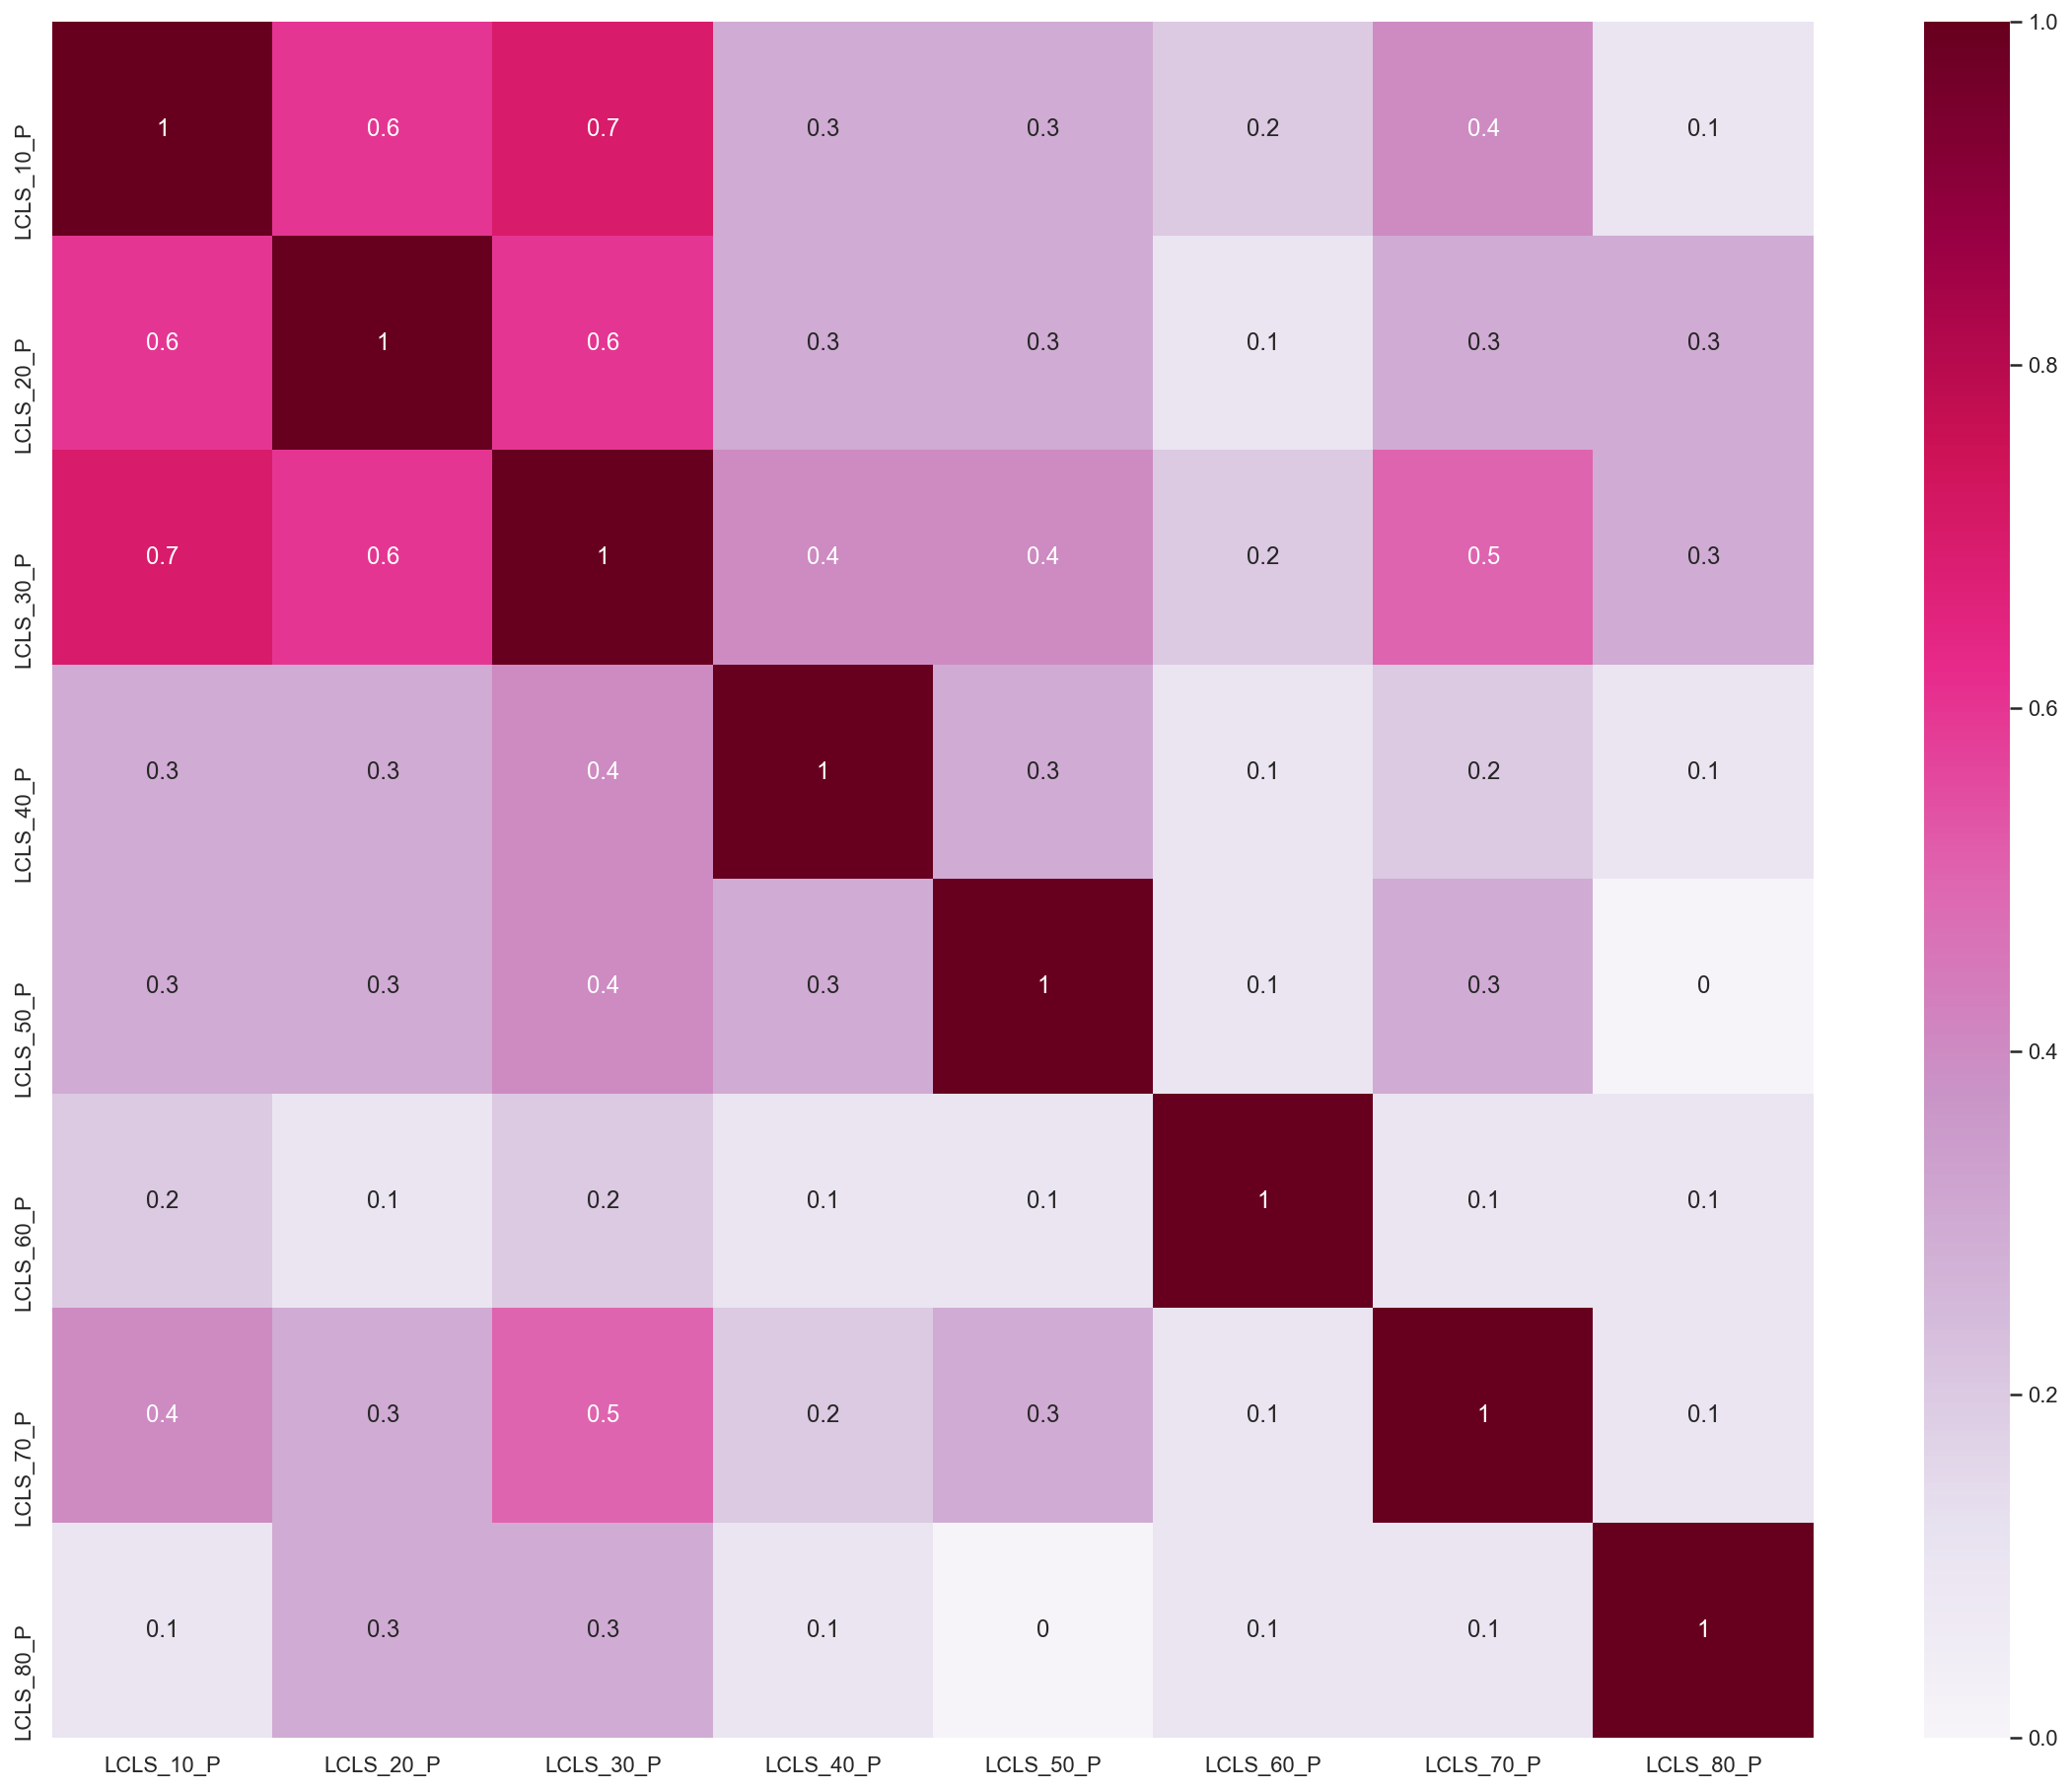

In [271]:
corr_mat = (test.corr()).round(1)
sns.set(rc={'figure.figsize': (20, 16)}, )
x = sns.heatmap(data=corr_mat, annot=True, cmap='PuRd')

In [272]:
print(categories_kor)
print(categories)

['식사', '간식', '마실거리', '홈/리빙', '헬스/뷰티', '취미/여가활동', '사회활동', '임신/육아']
['LCLS_10_P', 'LCLS_20_P', 'LCLS_30_P', 'LCLS_40_P', 'LCLS_50_P', 'LCLS_60_P', 'LCLS_70_P', 'LCLS_80_P']


In [243]:
df__ = df.copy()

In [244]:
scaler = []
for x in range (0,len(df__)):
    y= sum(list(df__.iloc[x,6:13]))
    scaler.append(y)
df__['scaler'] = scaler

In [245]:
df__.iloc[0,6:13]

LCLS_20_P      0.172221
LCLS_30_P      0.295458
LCLS_40_P     0.0232629
LCLS_50_P     0.0446794
LCLS_60_P     0.0050746
LCLS_70_P    0.00481966
LCLS_80_P    0.00363682
Name: 0, dtype: object

In [275]:
df__.head(2)

,OPER_DT,PVN,BOR,ADMD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,scaler
0,20190201,대구광역시,수성구,고산1동,1.064336,0.450848,0.172221,0.295458,0.023263,0.044679,0.005075,0.004820,0.003637,0.549152
1,20190201,대구광역시,수성구,고산2동,1.076418,0.457937,0.196274,0.295564,0.005521,0.034056,0.000844,0.008893,0.000913,0.542063


In [ ]:
df__["OPER_DT"]

In [ ]:
plt.plot(df_20_seo_j_sum_amt.OPER_DT, df_20_seo_j_sum_amt.AMT_IND, marker='s', color='r')


plt.title('2020년 서울 중구 매출지수', fontsize=20) 
plt.ylabel('당일매출지수', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()


No handles with labels found to put in legend.
/Users/dy/opt/anaconda3/envs/fc14/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45380 missing from current font.

/Users/dy/opt/anaconda3/envs/fc14/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49436 missing from current font.

/Users/dy/opt/anaconda3/envs/fc14/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50872 missing from current font.

/Users/dy/opt/anaconda3/envs/fc14/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51473 missing from current font.

/Users/dy/opt/anaconda3/envs/fc14/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44396 missing from current font.

/Users/dy/opt/anaconda3/envs/fc14/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47588 missing from current font.


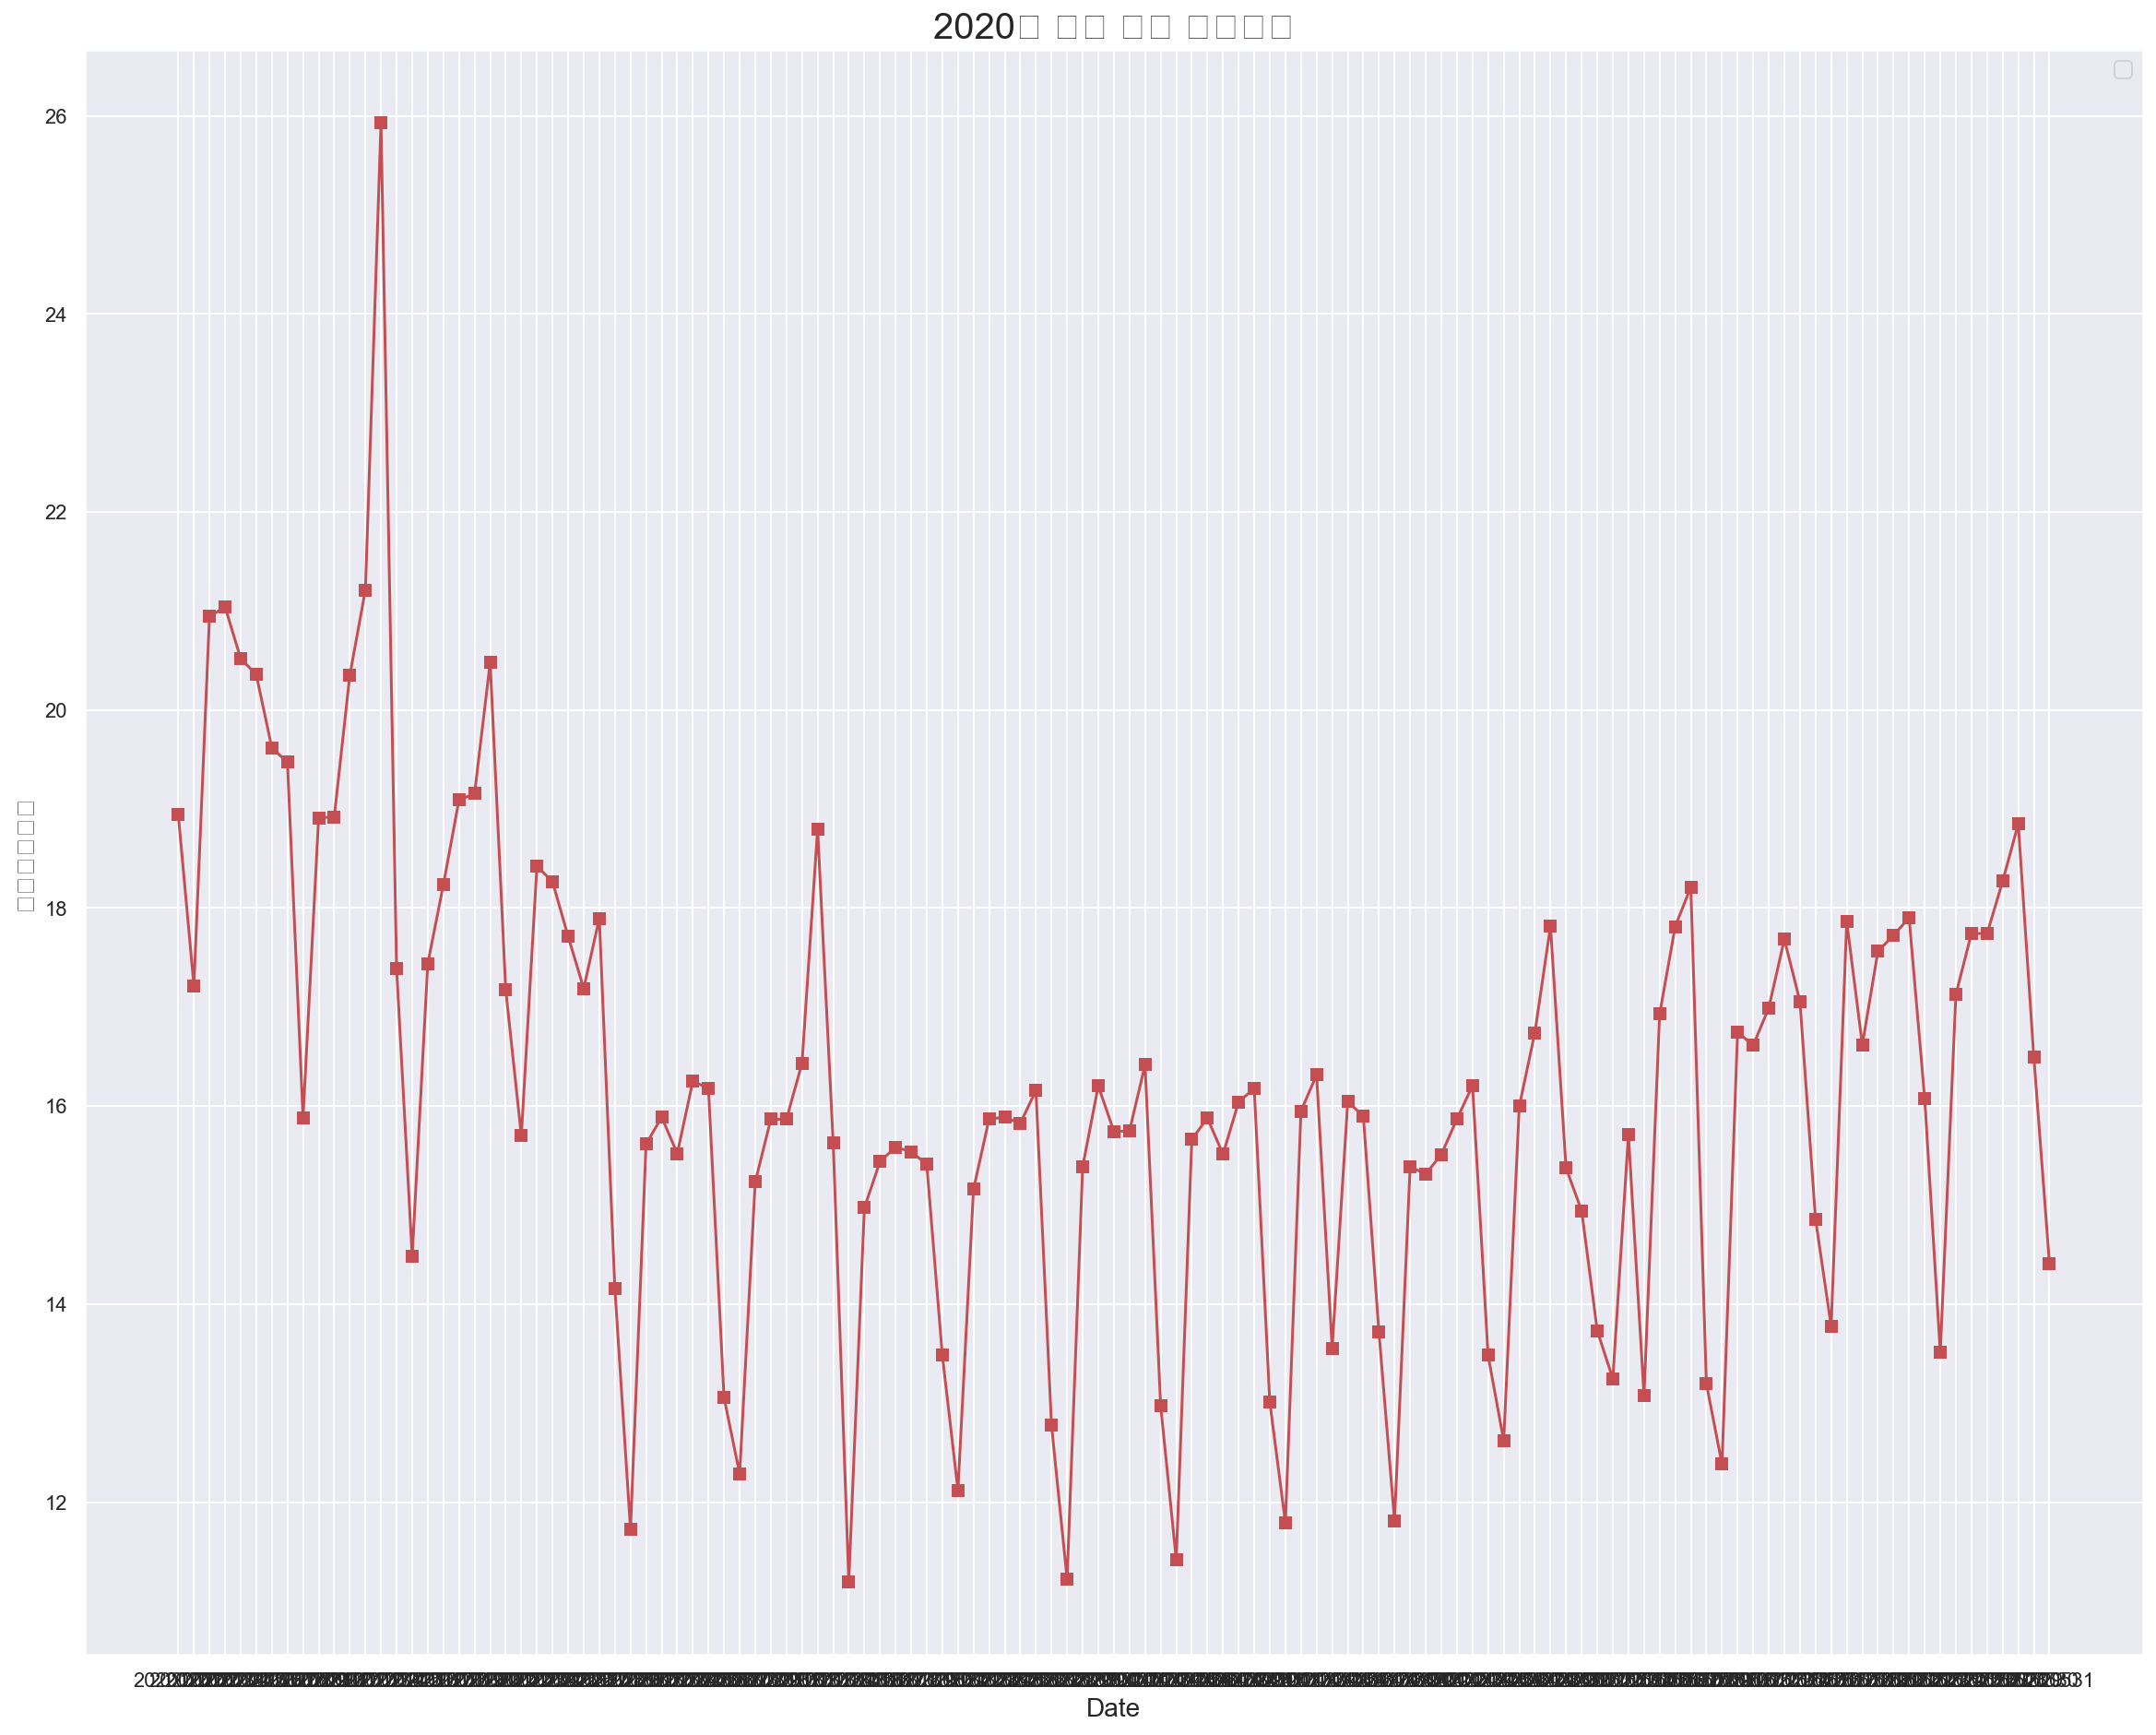

In [279]:
plt.plot(df_20_seo_j_sum_amt.OPER_DT, df_20_seo_j_sum_amt.AMT_IND, marker='s', color='r')


plt.title('2020년 서울 중구 매출지수', fontsize=20) 
plt.ylabel('당일매출지수', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()


In [ ]:
매출지수 * 헬스뷰티 비중해서 

In [ ]:
for x in range(0,len(df__)):
    for category in categories_kor:
        new = df__[category][x]/df__['scaler'][x]
        df__[category][x] = new

In [284]:
df_20_seo_j

,OPER_DT,PVN,BOR,ADMD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
7245,20200201,서울특별시,중구,광희동,1.333472,0.253670,0.182005,0.297591,0.022439,0.228066,0.001242,0.010857,0.004130
7246,20200201,서울특별시,중구,다산동,1.088066,0.211687,0.232660,0.344652,0.028818,0.165123,0.008669,0.004524,0.003867
7247,20200201,서울특별시,중구,동화동,0.699688,0.279339,0.311003,0.300749,0.023117,0.056325,0.017961,0.010594,0.000912
7248,20200201,서울특별시,중구,명동,1.148067,0.203972,0.183793,0.318308,0.015979,0.239891,0.004014,0.022636,0.011408
7249,20200201,서울특별시,중구,소공동,1.314688,0.223511,0.218398,0.291255,0.024853,0.215894,0.001483,0.017200,0.007407
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14455,20200531,서울특별시,중구,중림동,1.595038,0.314217,0.221087,0.344307,0.026204,0.070094,0.006347,0.013541,0.004203
14456,20200531,서울특별시,중구,청구동,1.389184,0.276333,0.221216,0.363681,0.053907,0.076963,0.001592,0.000353,0.005955
14457,20200531,서울특별시,중구,필동,0.714265,0.303338,0.187615,0.370371,0.038908,0.079408,0.007826,0.008298,0.004236
14458,20200531,서울특별시,중구,황학동,1.134190,0.264708,0.257387,0.367001,0.029140,0.070770,0.001060,0.003646,0.006287


In [340]:
aggregation_functions = {'AMT_IND': 'sum'}
df_19_seo_j_sum_amt = df_19_seo_j.groupby(df_19_seo_j['OPER_DT'], as_index=False).aggregate(aggregation_functions)
aggregation_function = {'LCLS_50_P': 'mean'}
LCLS_19_P = df_19_seo_j.groupby(df_19_seo_j['OPER_DT'], as_index=False).aggregate(aggregation_function)

LCLS_19 = pd.merge(left=df_19_seo_j_sum_amt, right=LCLS_19_P, on="OPER_DT")
LCLS_19['y'] = LCLS_19.AMT_IND * LCLS_19.LCLS_50_P
LCLS_19

,OPER_DT,AMT_IND,LCLS_50_P,y
0,20190201,18.918036,0.059570,1.126938
1,20190202,15.882379,0.059875,0.950958
2,20190203,15.455309,0.132952,2.054815
3,20190204,13.989231,0.065613,0.917871
4,20190205,15.850089,0.062547,0.991383
...,...,...,...,...
115,20190527,21.016365,0.089766,1.886561
116,20190528,22.227387,0.050349,1.119129
117,20190529,22.526331,0.050029,1.126976
118,20190530,22.560594,0.053617,1.209622


In [339]:
LCLS_20.AMT_IND * LCLS_20.LCLS_50_P

0      3.407641
1      3.210720
2      3.046125
3      2.942140
4      2.912318
         ...   
116    1.107314
117    1.133366
118    1.120416
119    1.072860
120    0.996409
Length: 120, dtype: float64

In [338]:
LCLS_19, LCLS_20

(      OPER_DT    AMT_IND  LCLS_50_P         y
 0    20190201  18.918036   0.059570  3.407641
 1    20190202  15.882379   0.059875  3.210720
 2    20190203  15.455309   0.132952  3.046125
 3    20190204  13.989231   0.065613  2.942140
 4    20190205  15.850089   0.062547  2.912318
 ..        ...        ...        ...       ...
 115  20190527  21.016365   0.089766  1.762141
 116  20190528  22.227387   0.050349  1.107314
 117  20190529  22.526331   0.050029  1.133366
 118  20190530  22.560594   0.053617  1.120416
 119  20190531  22.867152   0.052242  1.072860
 
 [120 rows x 4 columns],
       OPER_DT    AMT_IND  LCLS_50_P         y
 0    20200201  18.941511   0.179903  3.407641
 1    20200202  17.216085   0.186495  3.210720
 2    20200203  20.944280   0.145439  3.046125
 3    20200204  21.041575   0.139825  2.942140
 4    20200205  20.518967   0.141933  2.912318
 ..        ...        ...        ...       ...
 116  20200527  17.740383   0.062418  1.107314
 117  20200528  18.271545   0.062

ValueError: x and y must have same first dimension, but have shapes (120,) and (121,)

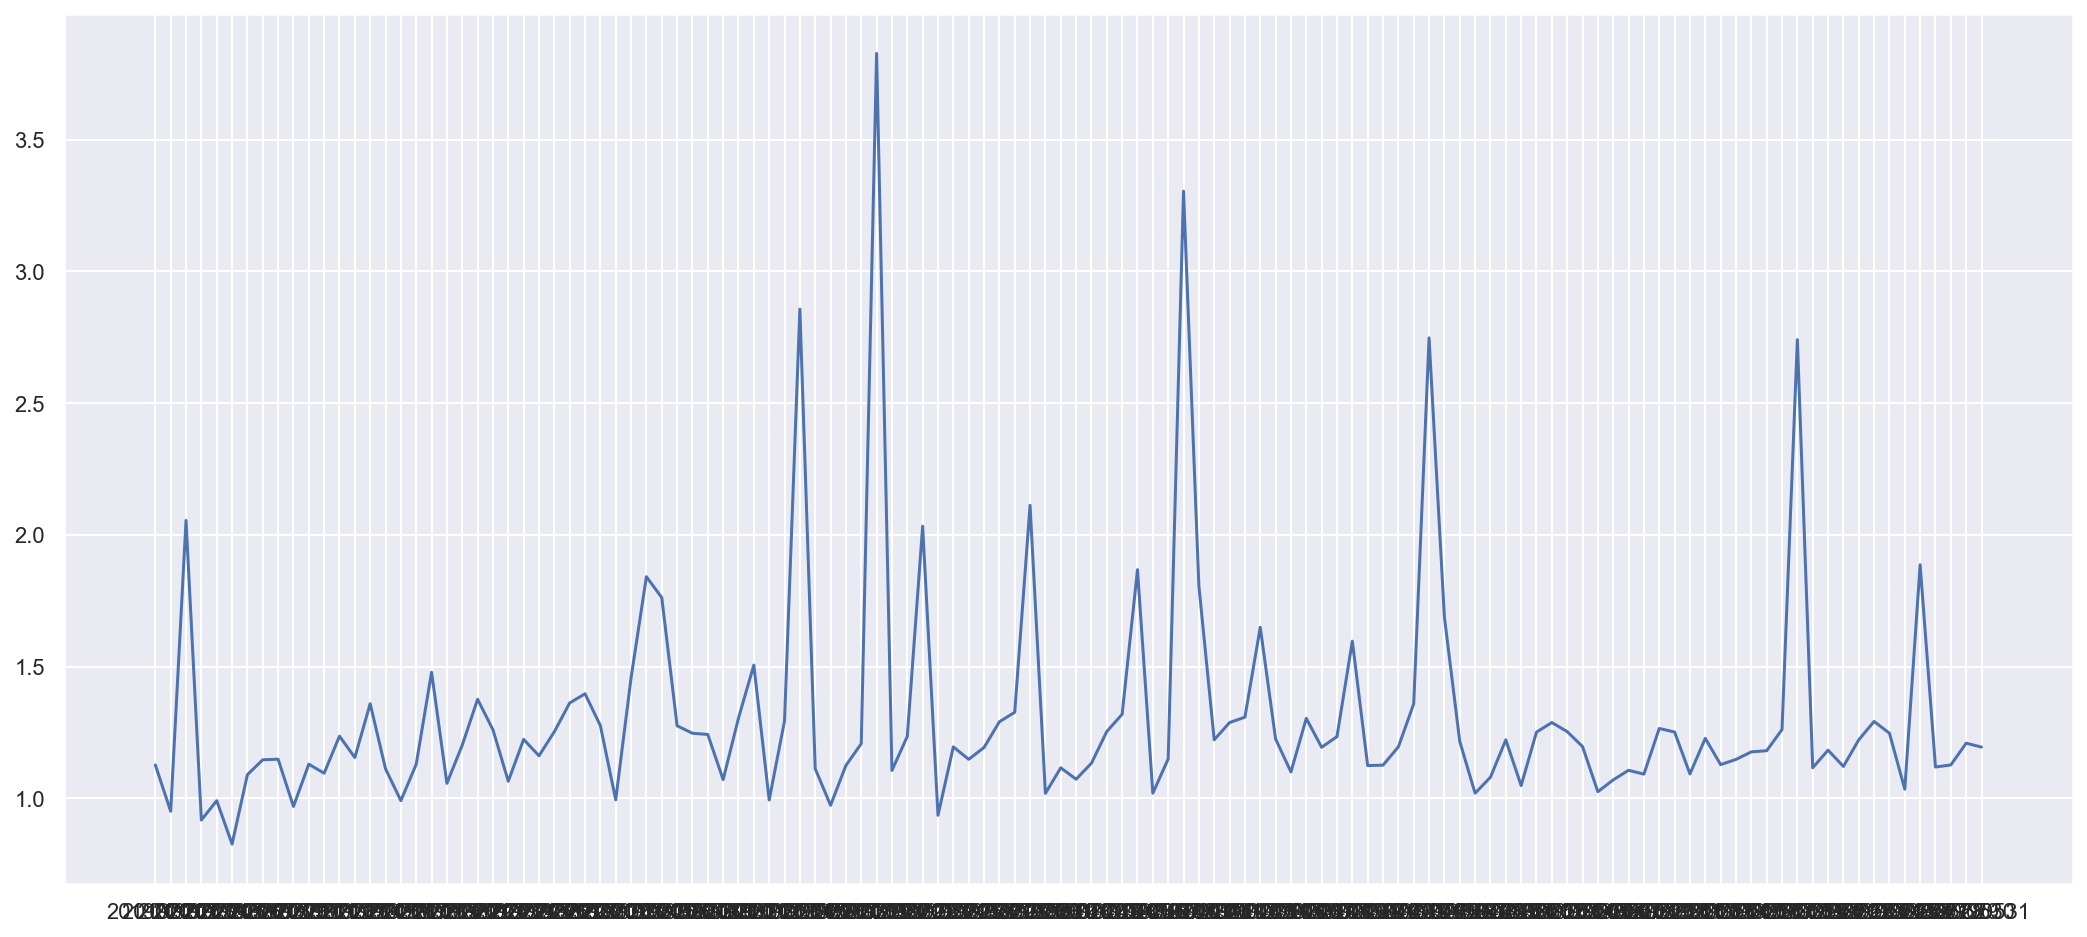

In [407]:
# def get_category_sales_index_graph(df_19_seo_j, df_20_seo_j):

# for idx in [df_19_seo_j, df_20_seo_j]:

aggregation_functions = {'AMT_IND': 'sum'}
df_19_seo_j_sum_amt = df_19_seo_j.groupby(df_19_seo_j['OPER_DT'], as_index=False).aggregate(aggregation_functions)

aggregation_function = {'LCLS_50_P': 'mean'}
LCLS_19_P = df_19_seo_j.groupby(df_19_seo_j['OPER_DT'], as_index=False).aggregate(aggregation_function)
LCLS_19 = pd.merge(left=df_19_seo_j_sum_amt, right=LCLS_19_P, on="OPER_DT")
LCLS_19['y'] = LCLS_19.AMT_IND * LCLS_19.LCLS_50_P

aggregation_functions = {'AMT_IND': 'sum'}
df_20_seo_j_sum_amt = df_20_seo_j.groupby(df_20_seo_j['OPER_DT'], as_index=False).aggregate(aggregation_functions)
aggregation_function = {'LCLS_50_P': 'mean'}
LCLS_20_P = df_20_seo_j.groupby(df_20_seo_j['OPER_DT'], as_index=False).aggregate(aggregation_function)

LCLS_20 = pd.merge(left=df_20_seo_j_sum_amt, right=LCLS_20_P, on="OPER_DT")
LCLS_20['y'] = LCLS_20.AMT_IND * LCLS_20.LCLS_50_P
# idx = LCLS_20.loc[LCLS_20['OPER_DT']=='20200229']
# LCLS_20.drop(index=idx.index, inplace=True)
 
x19 = LCLS_19.OPER_DT
y19 = LCLS_19.y
x20 = LCLS_20.OPER_DT
y20 = LCLS_20.y 
 



plt.figure(figsize=(18,8))
plt.plot(x19, y19, label='2019')
plt.plot(x19, y20, label='2020')

plt.grid(b=True)
plt.legend()
plt.xlabel('date (*20200229 omitted)', fontsize=20)
plt.ylabel('Health&Beauty sales index', fontsize=20)
plt.xticks([0, 28, 59, 89, 119], rotation=90)
plt.minorticks_on()
plt.title('seo_j 19.2.1~5.31 & 20.2.1~5.31*', fontsize=30)
plt.show()


In [401]:
# 나누고 중간에 로우 입력해서 append혹은 concat해주고
# 그 다음에 나머지 split된 값도 붙여서 반환해주자

LCLS_19 = pd.concat([LCLS_19[:28],temp1,LCLS_19[28:]])
LCLS_19.reset_index(inplace=True, drop=True)

In [402]:
aggregation_functions = {'AMT_IND': 'sum'}
df_20_seo_j_sum_amt = df_20_seo_j.groupby(df_20_seo_j['OPER_DT'], as_index=False).aggregate(aggregation_functions)
aggregation_function = {'LCLS_50_P': 'mean'}
LCLS_20_P = df_20_seo_j.groupby(df_20_seo_j['OPER_DT'], as_index=False).aggregate(aggregation_function)

LCLS_20 = pd.merge(left=df_20_seo_j_sum_amt, right=LCLS_20_P, on="OPER_DT")
LCLS_20['y'] = LCLS_20.AMT_IND * LCLS_20.LCLS_50_P
idx = LCLS_20.loc[LCLS_20['OPER_DT']=='20200229']

In [409]:
LCLS_20.index[:119]
LCLS_19.index[]

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            109, 110, 111, 112, 113, 114, 115, 116, 117, 118],
           dtype='int64', length=119)

In [405]:
del LCLS_19

In [404]:
LCLS_19

,OPER_DT,AMT_IND,LCLS_50_P,y
0,20190201,18.918036,0.059570,1.126938
1,20190202,15.882379,0.059875,0.950958
2,20190203,15.455309,0.132952,2.054815
3,20190204,13.989231,0.065613,0.917871
4,20190205,15.850089,0.062547,0.991383
...,...,...,...,...
117,20190527,21.016365,0.089766,1.886561
118,20190528,22.227387,0.050349,1.119129
119,20190529,22.526331,0.050029,1.126976
120,20190530,22.560594,0.053617,1.209622


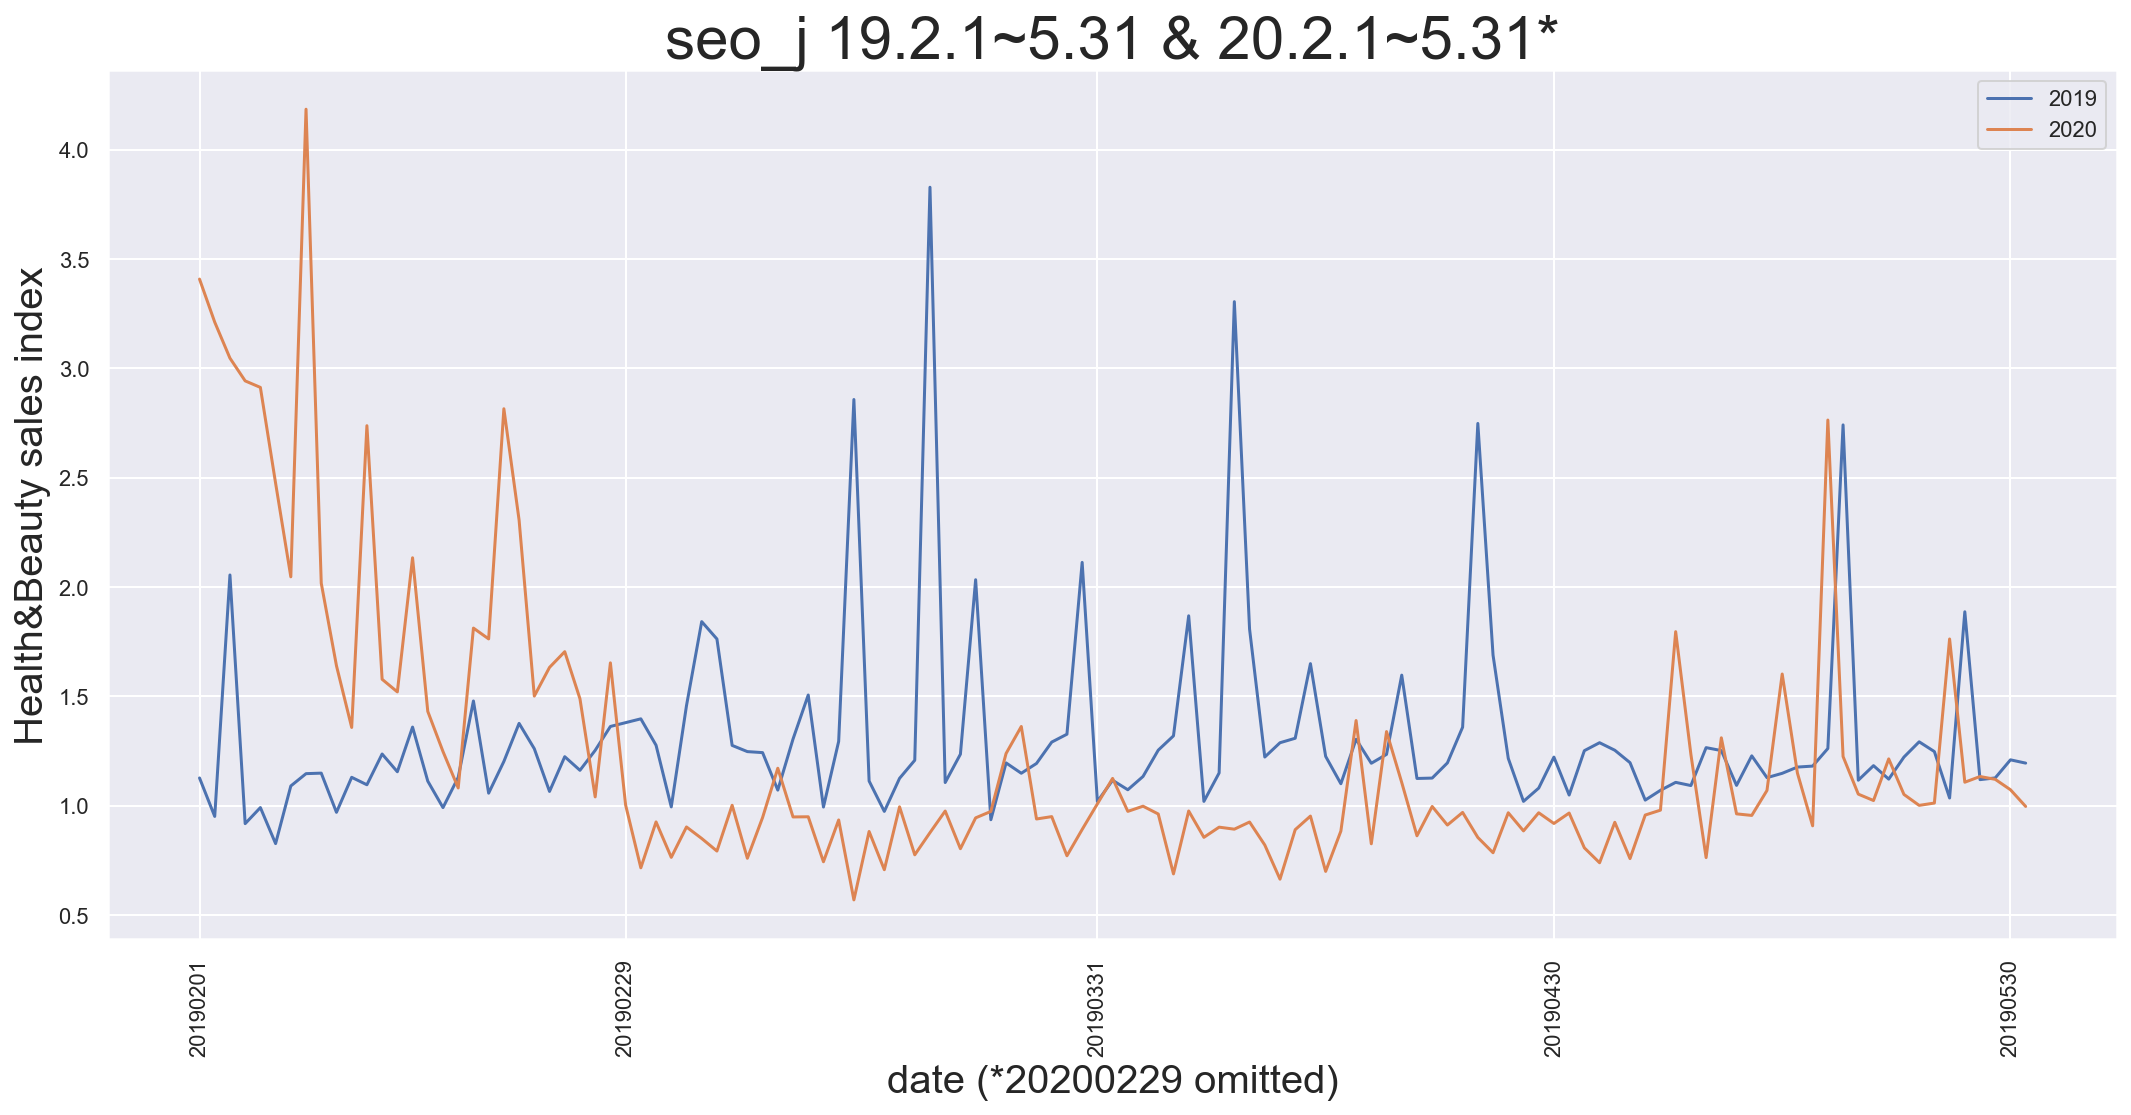

In [400]:
x19 = LCLS_19.OPER_DT
y19 = LCLS_19.y
x20 = LCLS_20.OPER_DT
y20 = LCLS_20.y 
 



plt.figure(figsize=(18,8))
plt.plot(x19, y19, label='2019')
plt.plot(x19, y20, label='2020')

plt.grid(b=True)
plt.legend()
plt.xlabel('date (*20200229 omitted)', fontsize=20)
plt.ylabel('Health&Beauty sales index', fontsize=20)
plt.xticks([0, 28, 59, 89, 119], rotation=90)
plt.minorticks_on()
plt.title('seo_j 19.2.1~5.31 & 20.2.1~5.31*', fontsize=30)
plt.show()


In [392]:
LCLS_19[27:29].mean()

temp = [{'OPER_DT' : '20190229',
        'AMT_IND' : 2.045022e+01,
        'LCLS_50_P': 6.767610e-02,
        'y' : 1.379657e+00}]

In [393]:
temp1 = pd.DataFrame(temp)

In [391]:
LCLS_19[27:29]

,OPER_DT,AMT_IND,LCLS_50_P,y
27,20190228,21.472914,0.063439,1.362213
28,20190301,19.427524,0.071914,1.397102


In [394]:
temp1

,OPER_DT,AMT_IND,LCLS_50_P,y
0,20190229,20.45022,0.067676,1.379657


In [ ]:
2019
2.1 Friday
3.1 Friday
4.1 Monday
5.1 Wednesday
5.31 Friday

2020
2.1 Saturday 
3.1 Sunday
4.1 Wednesday
5.1 Friday
5.31 Sunday

#2019년을 하루 앞으로 밀어줘서 요일을 맞춰준다
#2020년 2월은 윤달이라서 하루가 더 길다 -> LCLS_[:119]로 조정
#날짜는 2020년 날짜로 표기한다

2월 29일 추가해주고 
라인 그래프 널값 으로 뺴줄 수 있나
그리고 금요일하고 토요일 사이 그리고 일요일하고 월요일 사이 그리드 표시로 주말 평일 분리해서 볼 수 있게 완성

In [331]:
x = LCLS_20.loc[LCLS_20['OPER_DT']=='20200229']
x.index

Int64Index([28], dtype='int64')

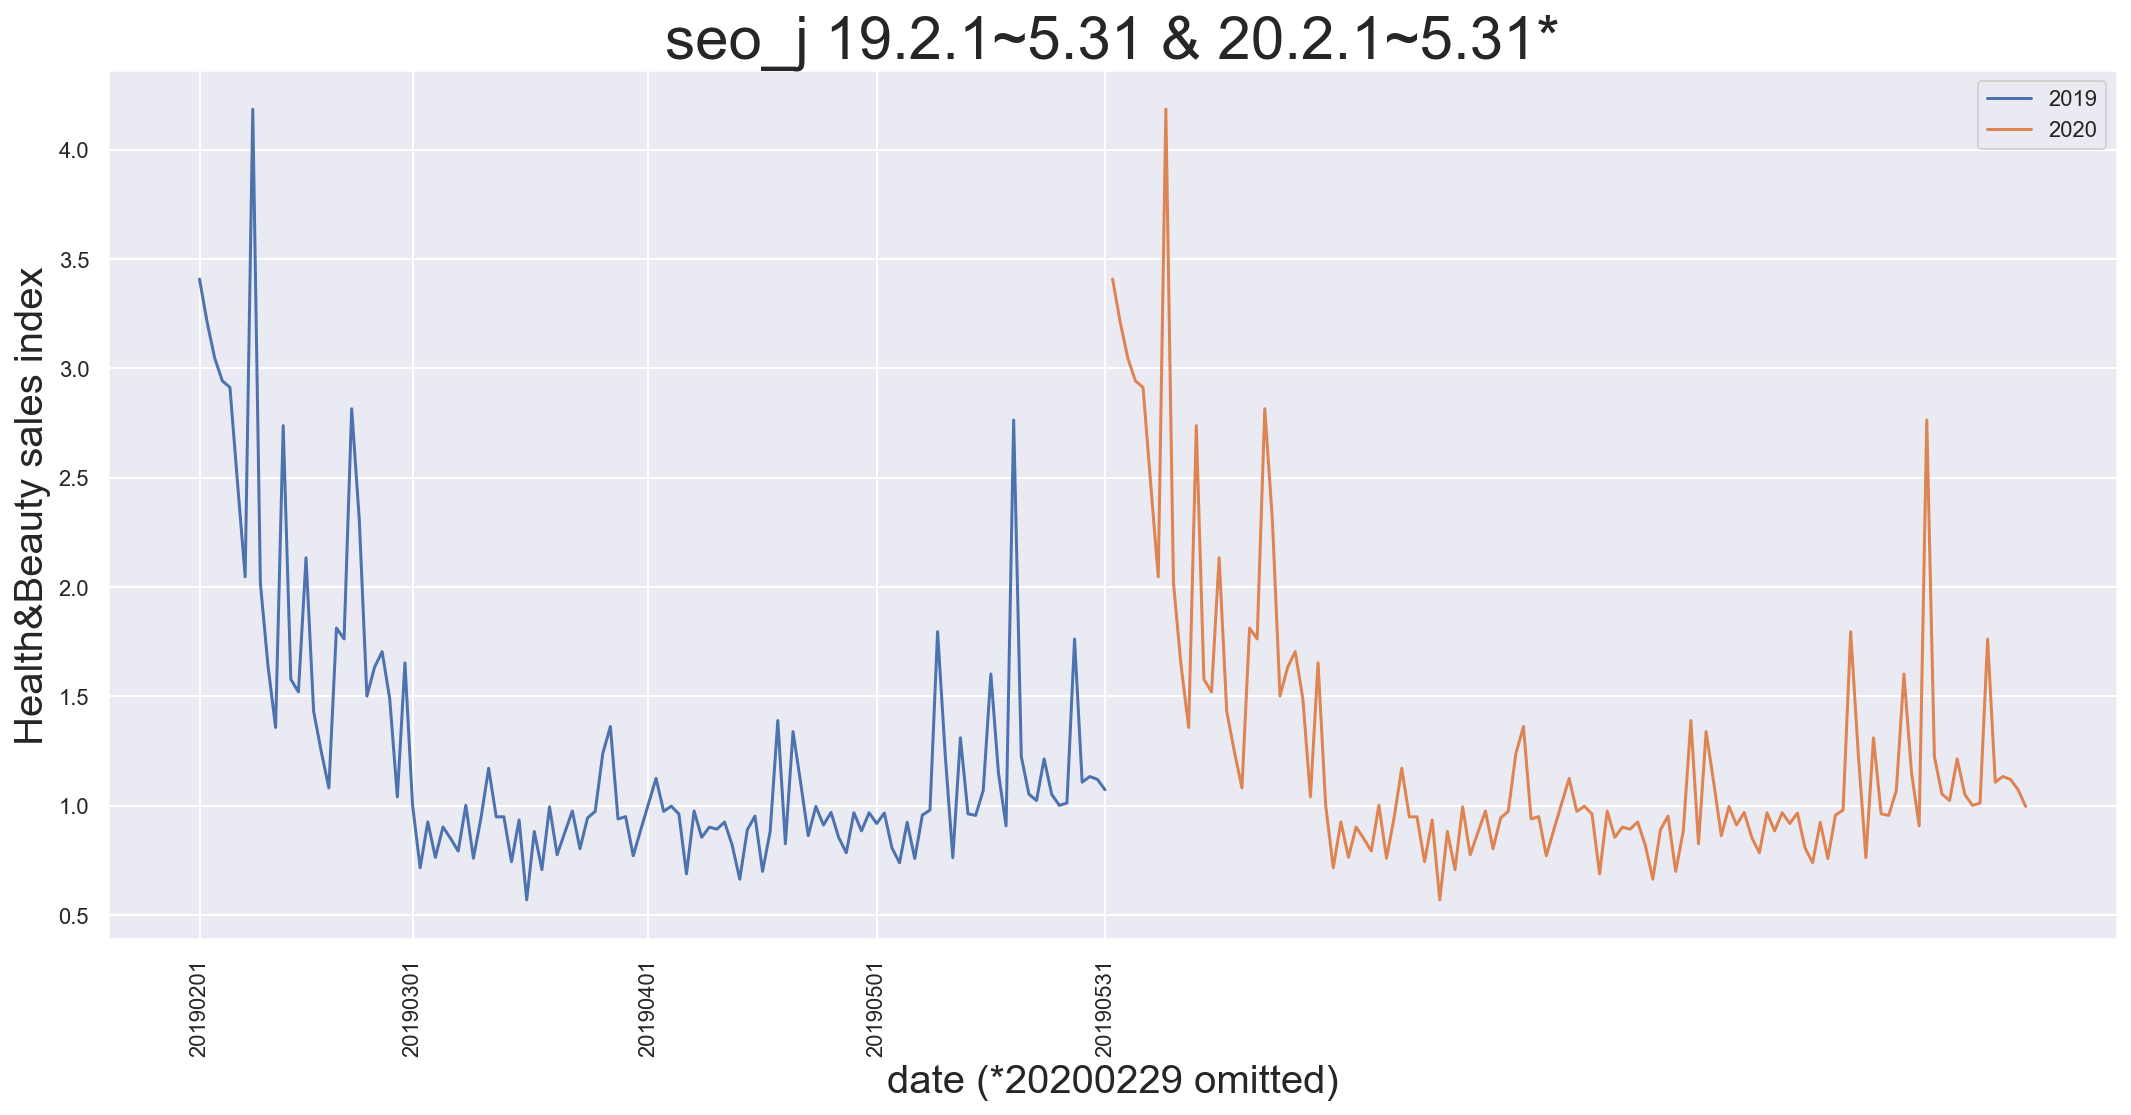

In [316]:
x19 = LCLS_19.OPER_DT
y19 = LCLS_19.y
x20 = LCLS_20.OPER_DT
y20 = LCLS_20.y 
 



plt.figure(figsize=(18,8))
plt.plot(x19, y19, label='2019')
plt.plot(x20, y20, label='2020')

plt.grid(b=True)
plt.legend()
plt.xlabel('date (*20200229 omitted)', fontsize=20)
plt.ylabel('Health&Beauty sales index', fontsize=20)
plt.xticks([0, 28, 59, 89, 119], rotation=90)
plt.minorticks_on()
plt.title('seo_j 19.2.1~5.31 & 20.2.1~5.31*', fontsize=30)
plt.show()

In [ ]:
plt.axvline(x=datetime(2016, 2, 17), color='r', linestyle='--', linewidth=3)
plt.axvline(x=datetime(2016, 6, 28), color='r', linestyle=':', linewidth=10)

In [ ]:
크게 봤을떄는 다를 수 있고 이해가 안갈수도 있겠지만 행정동 갯수 면적 인구수 따져보면 구체적으로 왜 매출지수마다 다른지 설명될 수 있을것이다